In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## UNIVARIATE ANALYSIS

In [ ]:
df=pd.read_csv('/content/gurgaon_properties_cleaned_v2.csv')

In [ ]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat                pyramid elite   sector 86   0.46   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   

   price_per_sqft     area                                       areaWithType  \
0          7585.0   1081.0  Super Built up area 1081(100.43 sq.m.)Carpet a...   
1          8600.0   1105.0                   Carpet area: 1103 (102.47 sq.m.)   
2            79.0  58228.0                 Carpet area: 58141 (5401.48 sq.m.)   
3          5470.0    585.0  Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...   
4          8020.0   1995.0  Super Built up area 1995(185.34 sq.m.)Built Up...   

   bedRoom  bathroom balcony  ...  super_built_up_area built_up_area  \
0        3         2       2  ...               1081.0           NaN   
1        2         2       2  ...                  NaN           NaN   
2        2         2       1  ...                  NaN           NaN   
3        2         2       1  ...                  NaN        1000.0   
4        3         4      3+  ...               1995.0        1615.0   

  carpet_area  study room  servant room  store room  pooja room  others  \
0       650.0           0             0           0           0       0   
1      1103.0           1             1           0           0       0   
2     58141.0           0             0           0           0       0   
3       585.0           0             0           0           0       0   
4      1476.0           0             1           0           0       1   

   furnishing_type  luxury_score  
0                1             8  
1                1            38  
2                1            15  
3                1            49  
4                2           174  

[5 rows x 23 columns]

**FLAT**

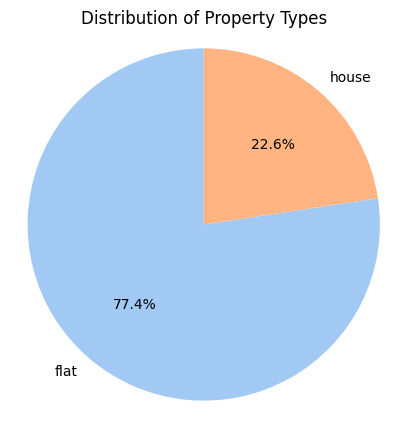

In [ ]:
# prompt: there is a columnin dataset propety_type make piechart with attractive colors

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'property_type' is the column name
property_type_counts = df['property_type'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))  # Adjust figure size if needed
colors = sns.color_palette('pastel')[0:5] # Use a color palette from seaborn
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Property Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


<Axes: xlabel='property_type'>

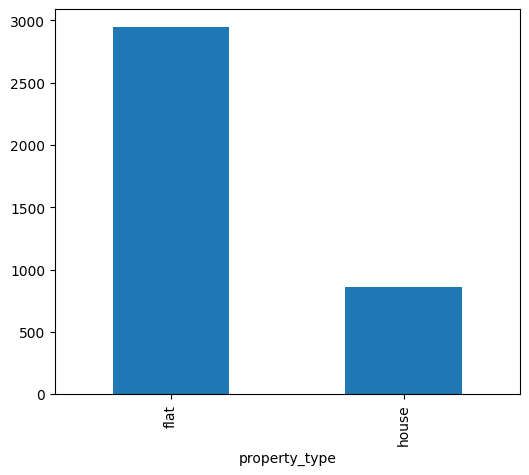

In [ ]:
df['property_type'].value_counts().plot(kind='bar',figsize=(6,5))

*Observations:    
Flats are in majority(75 percent) and there are less number of houses(~25 percent)     
No missing values*

**SOCIETY**

<Axes: xlabel='society'>

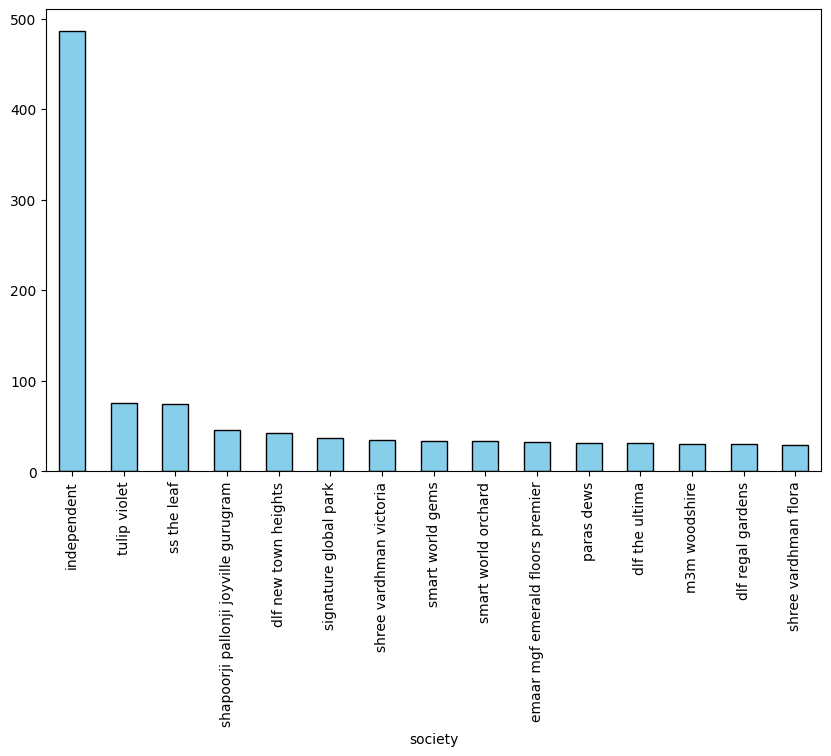

In [ ]:
# Bar plot for top 15 most frequent societies
df['society'].value_counts().head(15).plot(kind='bar', figsize=(10,6), color='skyblue', edgecolor='black')

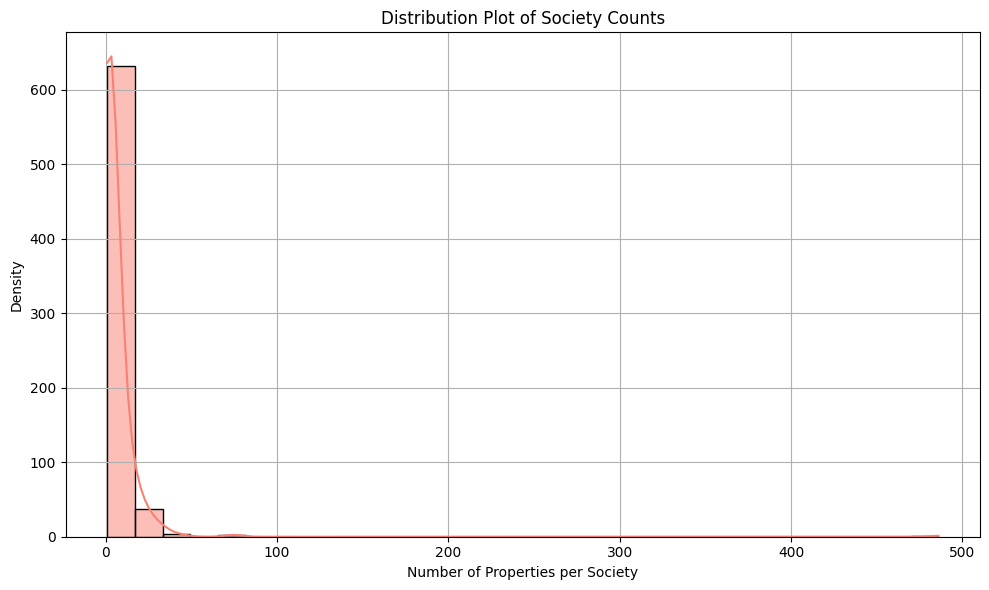

In [ ]:
# KDE PLOT


society_counts = df['society'].value_counts()
plt.figure(figsize=(10,6))
sns.histplot(society_counts, bins=30, kde=True, color='salmon')
plt.title('Distribution Plot of Society Counts')
plt.xlabel('Number of Properties per Society')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df[df['society']!='independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.022618
ss the leaf                             0.044934
shapoorji pallonji joyville gurugram    0.058504
dlf new town heights                    0.071170
signature global park                   0.082328
                                          ...   
dlf the primus                          0.485223
corona optus                            0.489445
imperia the esfera                      0.493667
ireo the corridors                      0.497587
ats kocoon                              0.501508
Name: proportion, Length: 75, dtype: float64

In [ ]:
society_count=df['society'].value_counts()
# Frequency distribution for societis
frequency_bins={
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(97),
 'Low (2-9)': np.int64(285),
 'Very Low (1)': np.int64(291)}

<Axes: xlabel='society'>

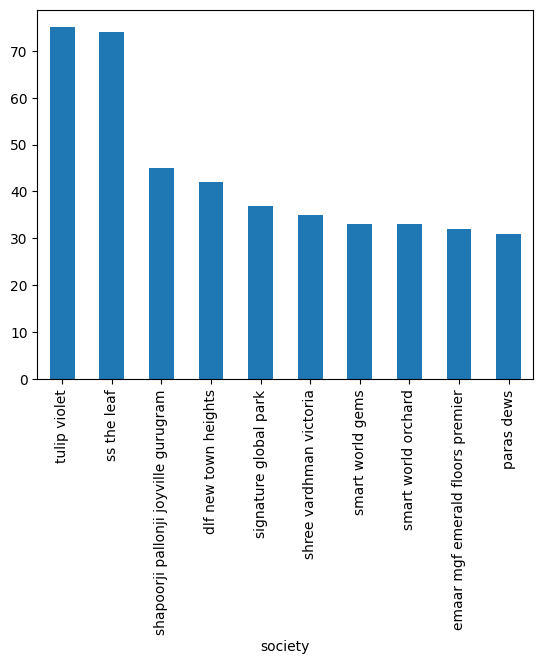

In [ ]:
# Top 10 societis
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [ ]:
 df['society'].isnull().sum()

np.int64(1)

### Observations:

- Around **13%** of properties come under the **'independent'** tag.
- There are a total of **675 unique societies**.
- The **top 75 societies** account for **50% of the properties**, while the remaining **600 societies** account for the other **50%**.
  
**Frequency distribution of societies:**
- **Very High (>100):** Only **1 society** has more than 100 listings.
- **High (50–100):** **2 societies** have between 50 to 100 listings.
- **Average (10–49):** **92 societies** fall in this range with 10 to 49 listings each.
- **Low (2–9):** **273 societies** have between 2 to 9 listings.
- **Very Low (1):** A significant number, **308 societies**, have only 1 listing.

- There is **1 missing value** in the `society` column.


**SECTOR**

In [ ]:
df['sector'].value_counts().shape

(113,)

<Axes: xlabel='sector'>

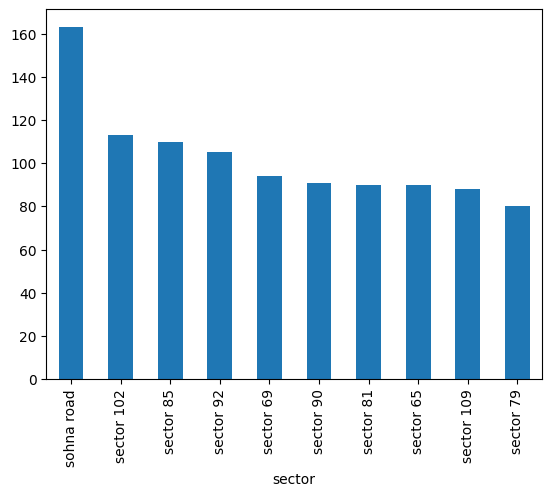

In [ ]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [ ]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins


{'Very High (>100)': np.int64(4),
 'High (50-100)': np.int64(25),
 'Average (10-49)': np.int64(62),
 'Low (2-9)': np.int64(21),
 'Very Low (1)': np.int64(1)}

### Observations

There are a total of **104 unique sectors** in the dataset.

**Frequency distribution of sectors:**
- **Very High (>100):** 3 sectors have more than 100 listings.
- **High (50–100):** 25 sectors have between 50 to 100 listings.
- **Average (10–49):** A majority, 60 sectors, fall in this range with 10 to 49 listings each.
- **Low (2–9):** 16 sectors have between 2 to 9 listings.
- **Very Low (1):** Interestingly, there are *no* sectors with only 1 listing.


**PRICe**

In [ ]:
df['price'].isnull().sum()

np.int64(18)

In [ ]:
df['price'].describe()

count    3785.000000
mean        2.505804
std         2.950121
min         0.070000
25%         0.940000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

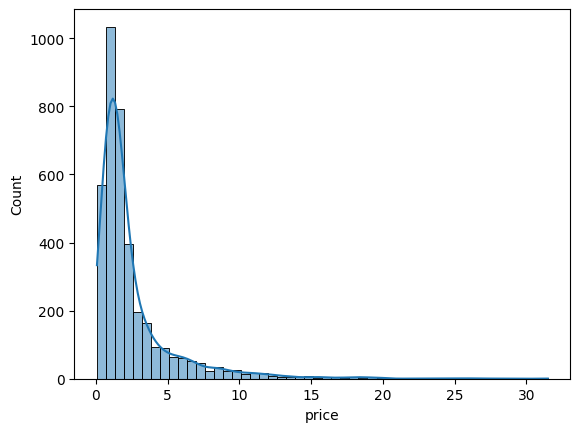

In [ ]:
sns.histplot(df['price'],kde=True,bins=50)

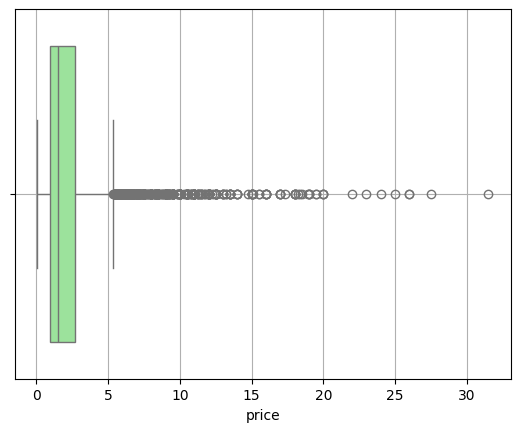

In [ ]:
sns.boxplot(x=df['price'],color='lightgreen')
plt.grid()

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR (Q3 - Q1):", IQR)


Q1 (25th percentile): 0.94
Q3 (75th percentile): 2.7
IQR (Q3 - Q1): 1.7600000000000002


### Descriptive Statistics:

- **Count:** There are **3,785** non-missing entries in the `price` column.
- **Missing Values:** There are **18 missing values** in the `price` column.
- **Mean Price:** The average price is approximately **2.51 crores**.
- **Median Price:** The median (50th percentile) price is **1.50 crores**.
- **Standard Deviation:** The prices have a standard deviation of **2.95**, indicating notable variability.
- **Range:** Prices range from a minimum of **0.07 crores** to a maximum of **31.5 crores**.
- **Interquartile Range (IQR):**
  - **Q1 (25th percentile):** 0.94 crores  
  - **Q3 (75th percentile):** 2.70 crores  
  - **IQR (Q3 - Q1):** 1.76 crores

---

### Visualizations:

- **Distribution (Histogram):** Most properties are priced in the lower range (below 5 crores), with a long tail extending toward high-value listings, some exceeding 10 crores.
- **Box Plot:** The box plot reveals the spread and outliers in the dataset. Properties priced above approximately **10 crores** fall beyond the upper whisker and may be considered **outliers**.


In [ ]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.3113346542178137 15.257818585808831


### Skewness:
The price distribution has a skewness of approximately **3.31**, indicating a **positive skew**. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

### Kurtosis:
The kurtosis value is approximately **15.26**. A kurtosis value greater than 3 indicates a distribution with **heavier tails** and **more outliers** compared to a normal distribution.


In [ ]:
quantiles=df['price'].quantile([0.01,0.05,0.95,0.99])
quantiles

0.01     0.250
0.05     0.370
0.95     8.490
0.99    15.016
Name: price, dtype: float64

### Quantile Analysis:

- <span style="color:blue">**1% Quantile:**</span> Only 1% of properties are priced below <span style="color:green">**0.25 crores**</span>.
- <span style="color:blue">**5% Quantile:**</span> 5% of properties are priced below <span style="color:green">**0.37 crores**</span>.
- <span style="color:blue">**95% Quantile:**</span> 95% of properties are priced below <span style="color:green">**8.49 crores**</span>.
- <span style="color:blue">**99% Quantile:**</span> 99% of properties are priced below <span style="color:green">**15.02 crores**</span>, indicating that very few properties are priced above this value.


In [ ]:
Q1=df['price'].describe()['25%']
Q3=df['price'].describe()['75%']
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [ ]:


print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


IQR: 1.7600000000000002
Lower Bound: -1.7000000000000006
Upper Bound: 5.340000000000001


In [ ]:
outliers=df[(df['price']>upper_bound)|(df['price']<lower_bound)]
outliers.shape

(432, 23)

In [ ]:

outliers['price'].describe()

count    432.000000
mean       9.196157
std        4.061291
min        5.350000
25%        6.400000
50%        8.000000
75%       10.607500
max       31.500000
Name: price, dtype: float64

### <span style="color:darkred">Outliers Analysis (using IQR method):</span>

- Based on the IQR method, there are <span style="color:blue"><strong>432</strong></span> properties considered as outliers.
- These outliers have an average price of approximately <span style="color:green"><strong>9.20 crores</strong></span>.
- The price range for these outliers is from <span style="color:green"><strong>5.35 crores</strong></span> to <span style="color:green"><strong>31.5 crores</strong></span>.


<Axes: xlabel='price'>

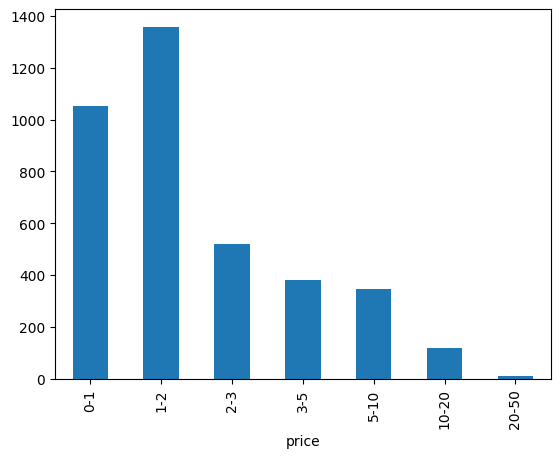

In [ ]:

# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

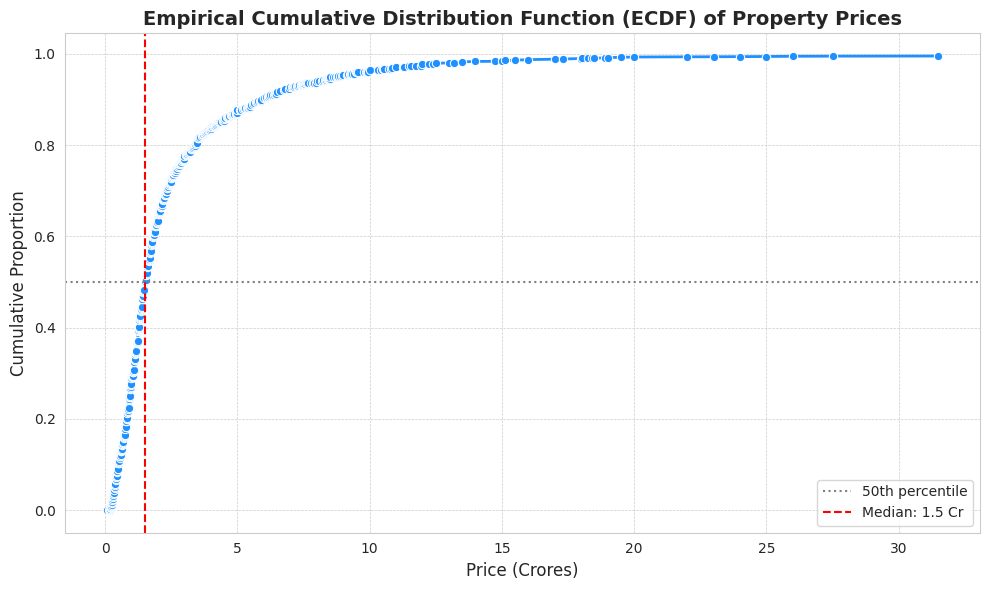

In [ ]:
# Calculate ECDF
price_counts = df['price'].value_counts().sort_index()
ecdf = price_counts.cumsum() / len(df['price'])

# Plot with Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Line plot with markers
sns.lineplot(x=ecdf.index, y=ecdf.values, marker='o', color='dodgerblue', linewidth=2)

# Add title and labels
plt.title("Empirical Cumulative Distribution Function (ECDF) of Property Prices", fontsize=14, weight='bold')
plt.xlabel("Price (Crores)", fontsize=12)
plt.ylabel("Cumulative Proportion", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add horizontal and vertical lines at key percentiles (optional)
plt.axhline(0.5, color='gray', linestyle=':', label='50th percentile')
plt.axvline(df['price'].median(), color='red', linestyle='--', label=f'Median: {df["price"].median()} Cr')

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-39-d63b369d1981>:32: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-39-d63b369d1981>:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


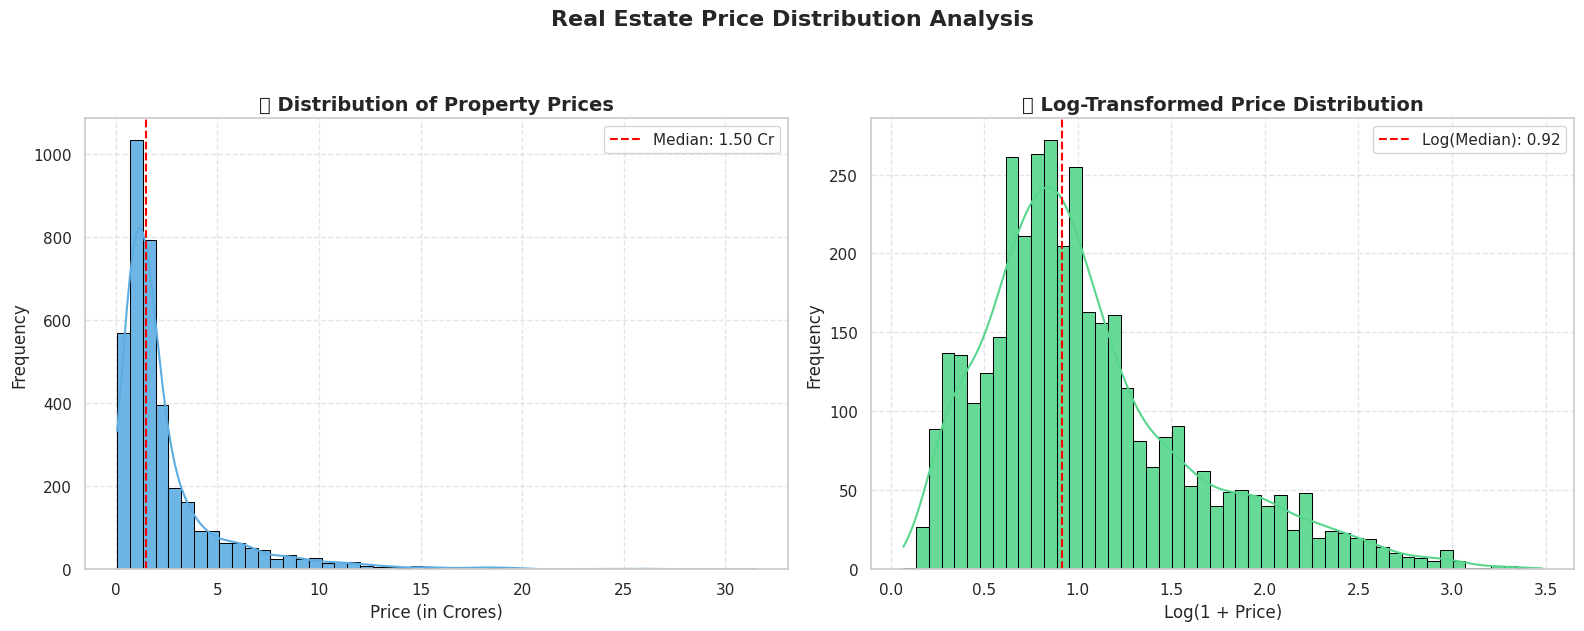

In [ ]:
# Set Seaborn theme for better visuals
sns.set_theme(style="whitegrid")

# Create the figure
plt.figure(figsize=(16, 6))

# Custom color palette
colors = ['#5DADE2', '#58D68D']

# Plot 1: Original Price Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color=colors[0], edgecolor='black', alpha=0.9)
plt.axvline(df['price'].median(), color='red', linestyle='--', label=f"Median: {df['price'].median():.2f} Cr")
plt.title('🏠 Distribution of Property Prices', fontsize=14, weight='bold')
plt.xlabel('Price (in Crores)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Plot 2: Log-Transformed Price Distribution
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color=colors[1], edgecolor='black', alpha=0.9)
plt.axvline(np.log1p(df['price'].median()), color='red', linestyle='--', label=f"Log(Median): {np.log1p(df['price'].median()):.2f}")
plt.title('📊 Log-Transformed Price Distribution', fontsize=14, weight='bold')
plt.xlabel('Log(1 + Price)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Final layout adjustments
plt.suptitle("Real Estate Price Distribution Analysis", fontsize=16, weight='bold', y=1.05)
plt.tight_layout()
plt.show()

### 🔍 Conclusion

- The original price data is **right-skewed**, with most properties priced lower and a few high-priced outliers.
- Applying a **log transformation** normalizes the distribution, making it more suitable for modeling.
- This helps reduce the impact of outliers and reveals a clearer structure in the data.


In [ ]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0830237140465715 1.006599721590867


### 🔄 Comparison: Original vs Log-Transformed Price Distribution

| Metric        | Original Price     | Log-Transformed Price |
|---------------|--------------------|------------------------|
| **Skewness**  | 3.31 (highly right-skewed) | 1.08 (mild skew)         |
| **Kurtosis**  | 15.26 (heavy tails, many outliers) | 1.01 (light tails, fewer outliers) |

- ✅ **Log transformation** significantly reduces skewness and kurtosis.
- 🔍 This makes the data more **normally distributed**, improving the performance and assumptions of many statistical models.


<ipython-input-41-e7ec39057cde>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['price'], color='skyblue', fliersize=8, linewidth=2, palette="Blues")
<ipython-input-41-e7ec39057cde>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(np.log1p(df['price']), color='lightgreen', fliersize=8, linewidth=2, palette="Greens")


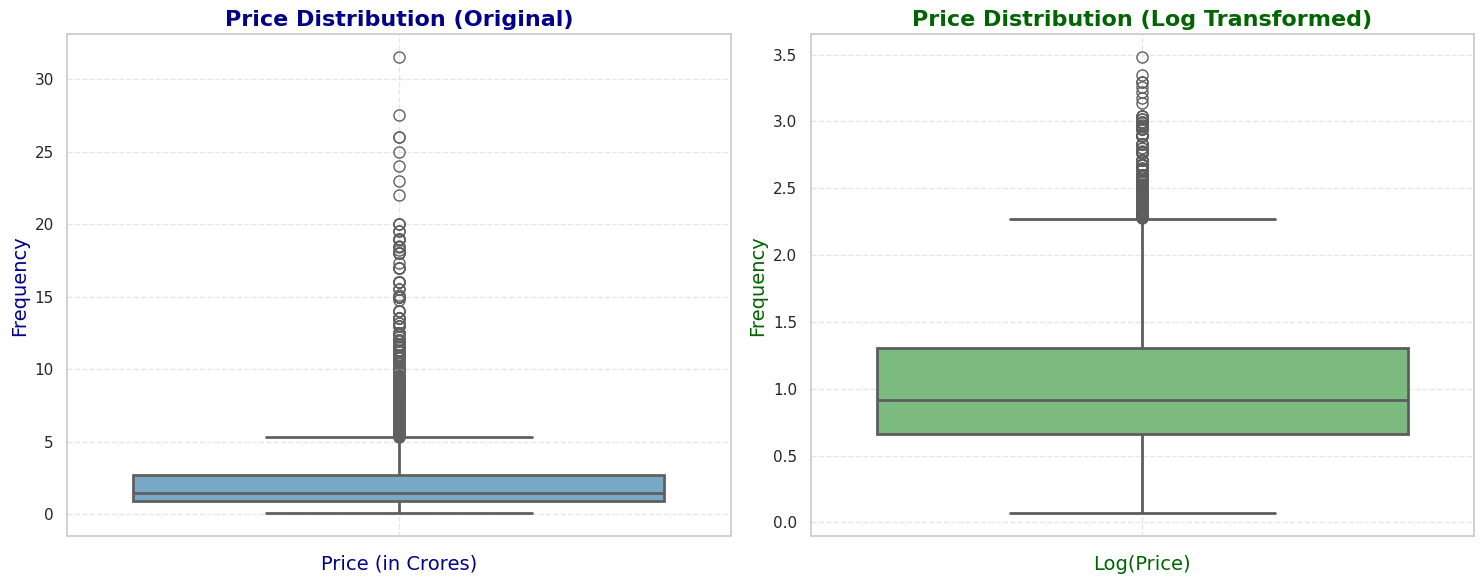

In [ ]:
# Set figure size and style
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue', fliersize=8, linewidth=2, palette="Blues")
plt.title('Price Distribution (Original)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Price (in Crores)', fontsize=14, color='darkblue')
plt.ylabel('Frequency', fontsize=14, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.5)

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen', fliersize=8, linewidth=2, palette="Greens")
plt.title('Price Distribution (Log Transformed)', fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel('Log(Price)', fontsize=14, color='darkgreen')
plt.ylabel('Frequency', fontsize=14, color='darkgreen')
plt.grid(True, linestyle='--', alpha=0.5)

# Tight layout and show plot
plt.tight_layout()
plt.show()

**PRICE PER SQFT**

In [ ]:
df['price_per_sqft'].describe()

count      3785.000000
mean      13800.167768
std       23052.005585
min           4.000000
25%        6808.000000
50%        9000.000000
75%       13765.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

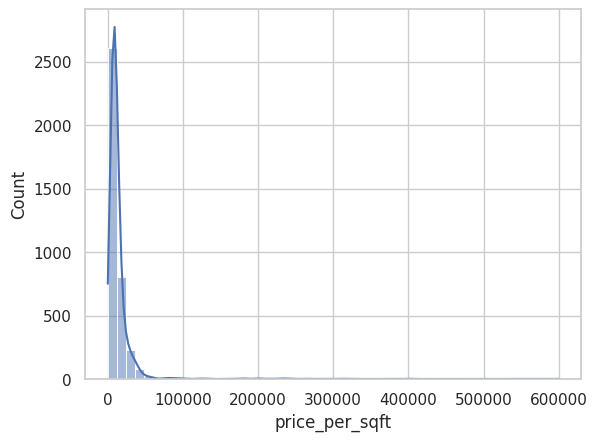

In [ ]:
sns.histplot(df['price_per_sqft'],kde=True,bins=50)

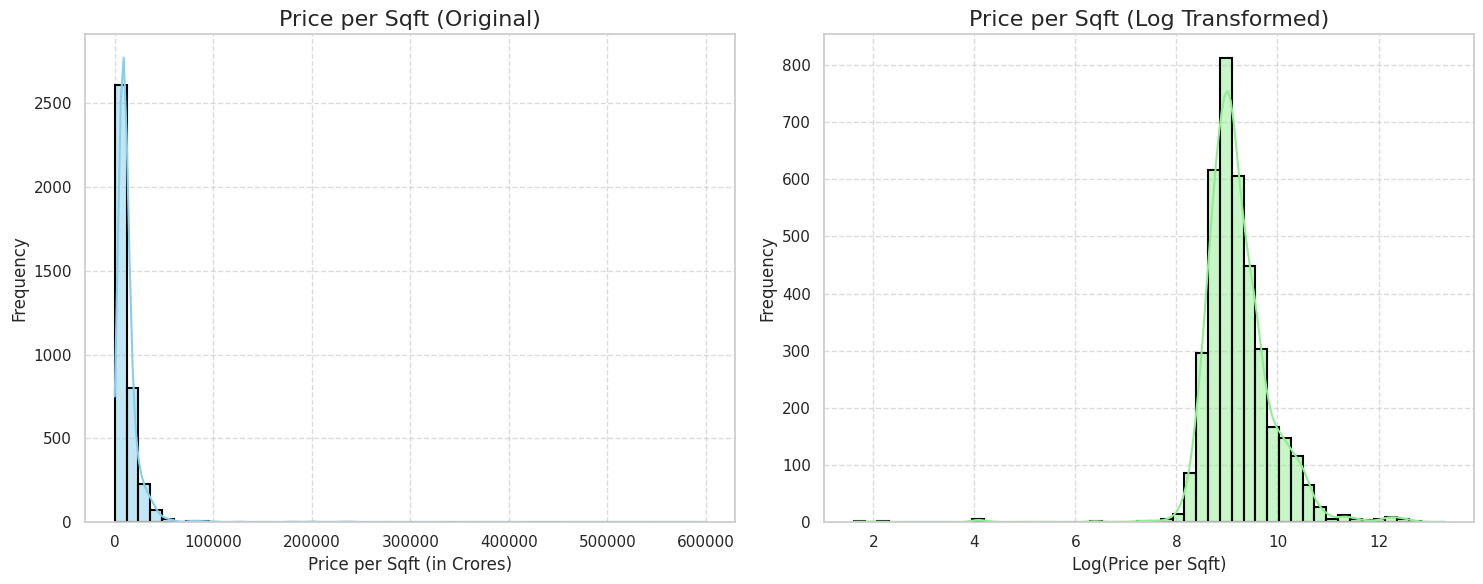

In [ ]:
# Set figure size
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price_per_sqft'], kde=True, bins=50, color='skyblue', edgecolor='black', linewidth=1.5)
plt.title('Price per Sqft (Original)', fontsize=16)
plt.xlabel('Price per Sqft (in Crores)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price_per_sqft']), kde=True, bins=50, color='lightgreen', edgecolor='black', linewidth=1.5)
plt.title('Price per Sqft (Log Transformed)', fontsize=16)
plt.xlabel('Log(Price per Sqft)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
s=df['price_per_sqft'].skew()
k=df['price_per_sqft'].kurt()

print(s,k)

11.43921995907752 187.0418660346142


In [ ]:
skewness = np.log1p(df['price_per_sqft']).skew()
kurtosis = np.log1p(df['price_per_sqft']).kurt()

print(skewness,kurtosis)


-0.9089314077598495 18.58844436924248


<Axes: ylabel='price_per_sqft'>

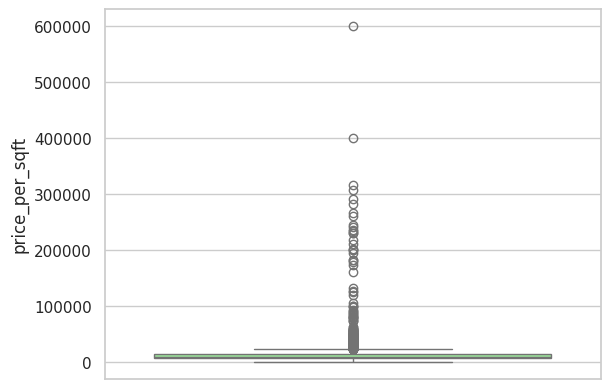

In [ ]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

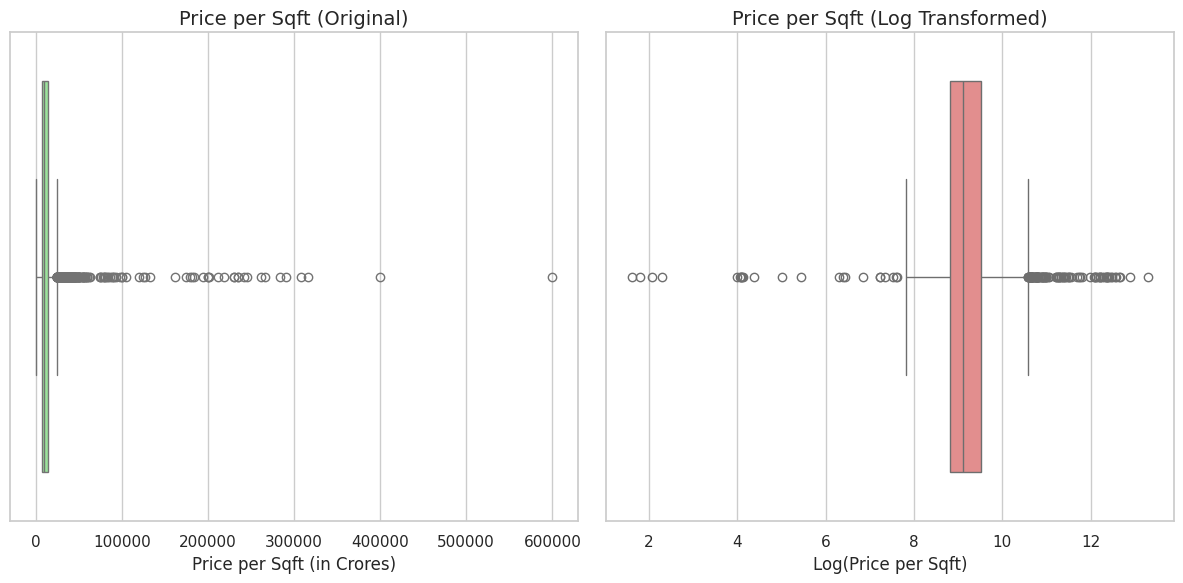

In [ ]:
# Create a new figure with a specific size
plt.figure(figsize=(12, 6))

# Box plot for the original 'price_per_sqft' column
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price_per_sqft'], color='lightgreen')
plt.title('Price per Sqft (Original)', fontsize=14)
plt.xlabel('Price per Sqft (in Crores)', fontsize=12)

# Box plot for the log-transformed 'price_per_sqft' column
plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(df['price_per_sqft']), color='lightcoral')
plt.title('Price per Sqft (Log Transformed)', fontsize=14)
plt.xlabel('Log(Price per Sqft)', fontsize=12)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Original Skewness: 11.4347
Original Kurtosis: 186.7933
Log1p Skewness: -0.9086
Log1p Kurtosis: 18.5623
Square Root Skewness: 4.6667
Square Root Kurtosis: 36.6155
Inverse Skewness: 33.7649
Inverse Kurtosis: 1215.9804


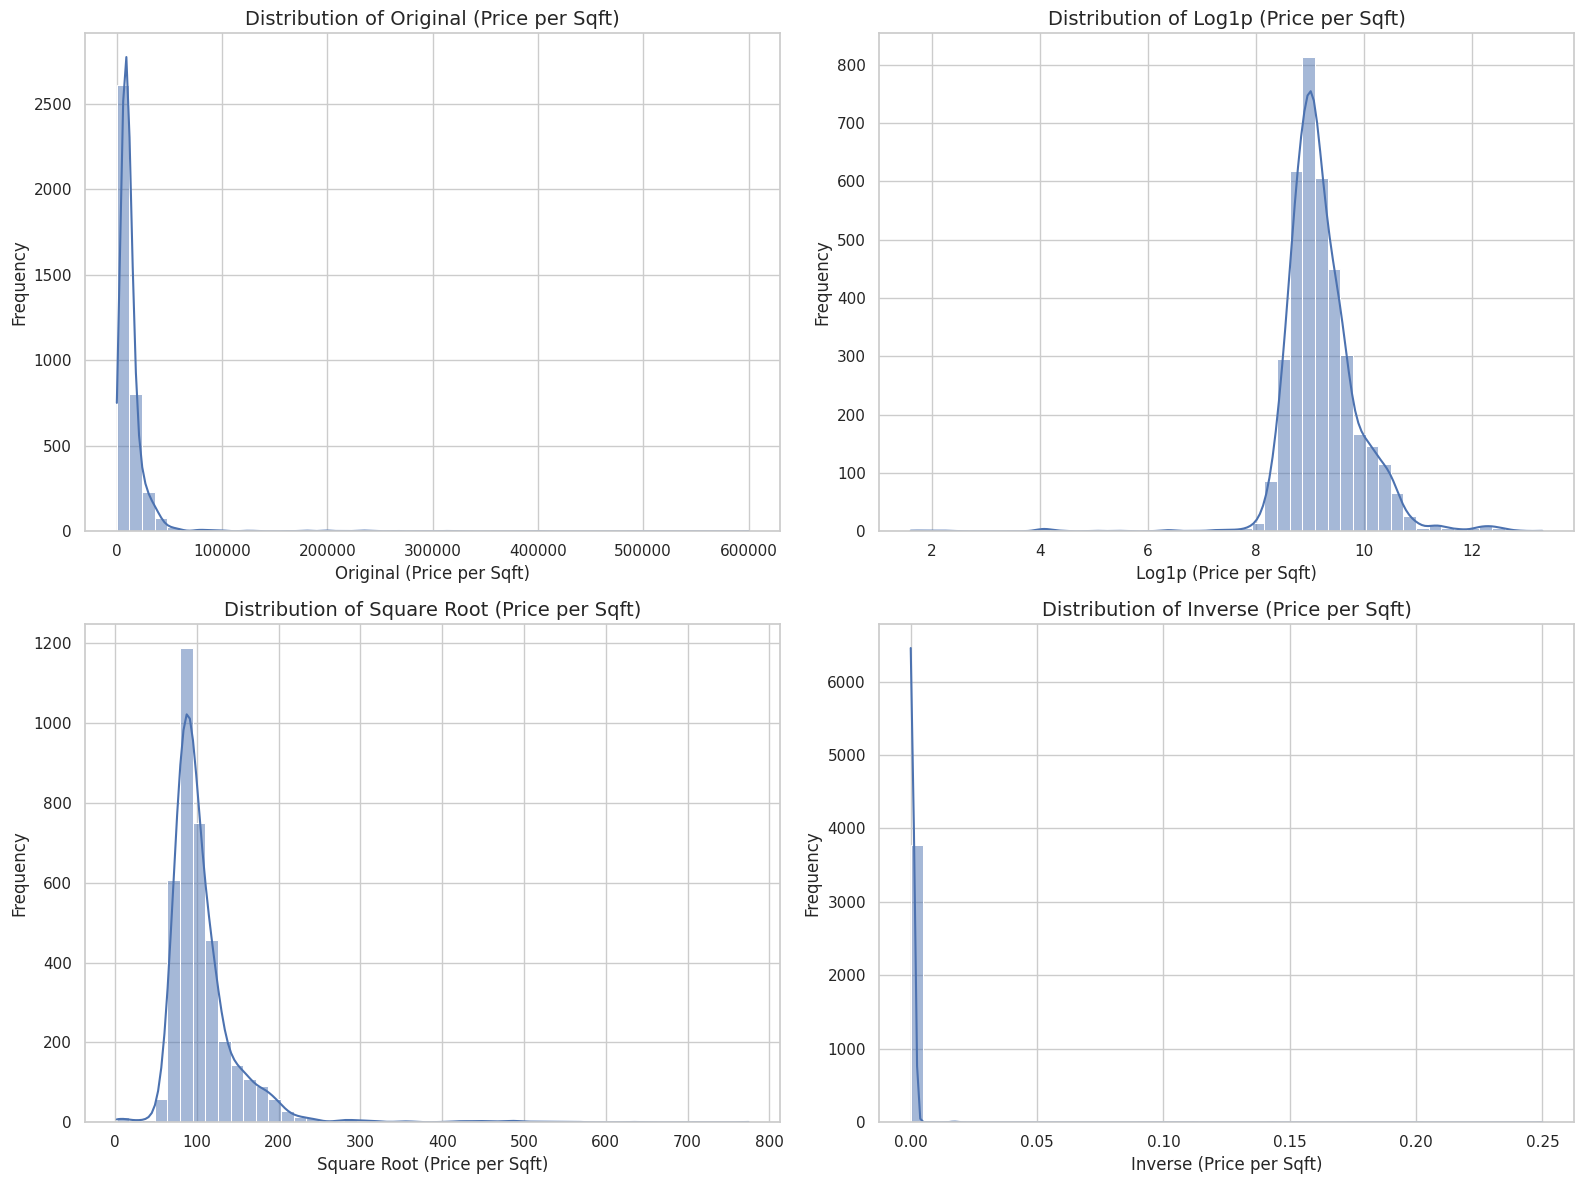

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

# Remove non-positive values (if any) in the 'price_per_sqft' column
cleaned_data = df[df['price_per_sqft'] > 0]

# List of transformations
transformations = {
    'Original': cleaned_data['price_per_sqft'],
    'Log1p': np.log1p(cleaned_data['price_per_sqft']),
    'Square Root': np.sqrt(cleaned_data['price_per_sqft']),
    'Inverse': 1 / (cleaned_data['price_per_sqft'] + 1e-5)  # Avoid division by zero
}

# Create a new figure with a specific size
plt.figure(figsize=(16, 12))

# Plot the distribution for each transformation
for idx, (trans_name, data) in enumerate(transformations.items(), 1):
    plt.subplot(2, 2, idx)
    sns.histplot(data, kde=True, bins=50)
    plt.title(f'Distribution of {trans_name} (Price per Sqft)', fontsize=14)
    plt.xlabel(f'{trans_name} (Price per Sqft)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Compute and print skewness and kurtosis for each transformation
    trans_skew = skew(data)
    trans_kurt = kurtosis(data)
    print(f'{trans_name} Skewness: {trans_skew:.4f}')
    print(f'{trans_name} Kurtosis: {trans_kurt:.4f}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### Conclusion:

| Transformation   | Skewness       | Kurtosis      |
|------------------|----------------|---------------|
| **Original**     | 11.43          | 186.79        |
| **Log1p**        | -0.91          | 18.56         |
| **Square Root**  | 4.67           | 36.62         |
| **Inverse**      | 33.76          | 1215.98       |

- The **Log1p** transformation is the most effective in reducing both skewness and kurtosis, making the distribution more normalized.
- The **Inverse** transformation increases both skewness and kurtosis, making it less suitable for this data.


**BesRoom**

In [ ]:
df['bedRoom'].isnull().sum()

np.int64(0)

In [ ]:
df['bedRoom']

0       3
1       2
2       2
3       2
4       3
       ..
3798    2
3799    5
3800    1
3801    5
3802    3
Name: bedRoom, Length: 3803, dtype: int64

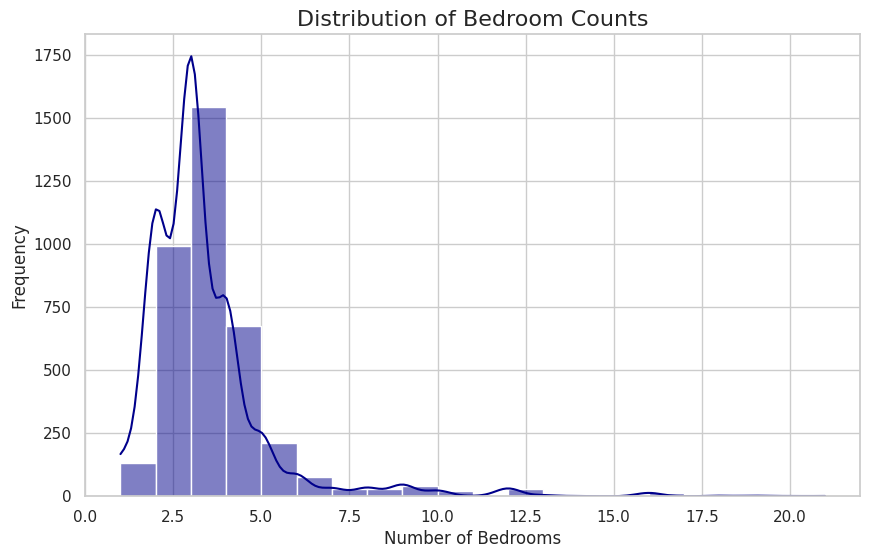

In [ ]:
# Set the size and style for the plot
plt.figure(figsize=(10, 6))

# Create a distribution plot for the 'bedRoom' column
sns.histplot(df['bedRoom'], kde=True, bins=20, color='darkblue')

# Add titles and labels
plt.title('Distribution of Bedroom Counts', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

<Axes: xlabel='bedRoom'>

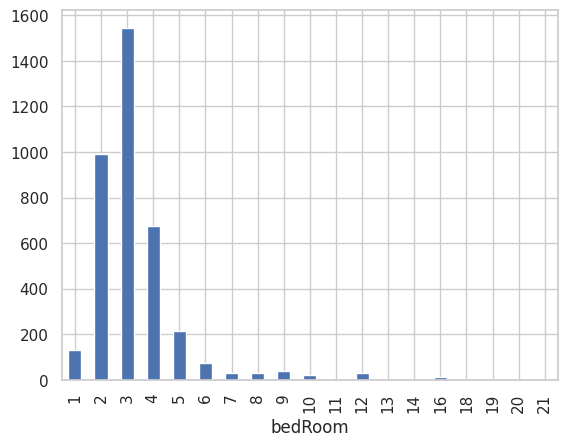

In [ ]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

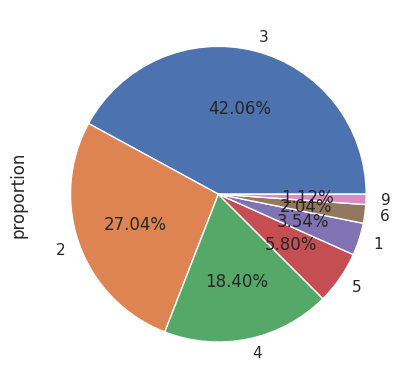

In [ ]:
df['bedRoom'].value_counts(normalize=True).head(7).plot(kind='pie', autopct='%1.2f%%')

**Bathroom**

<Axes: xlabel='bathroom'>

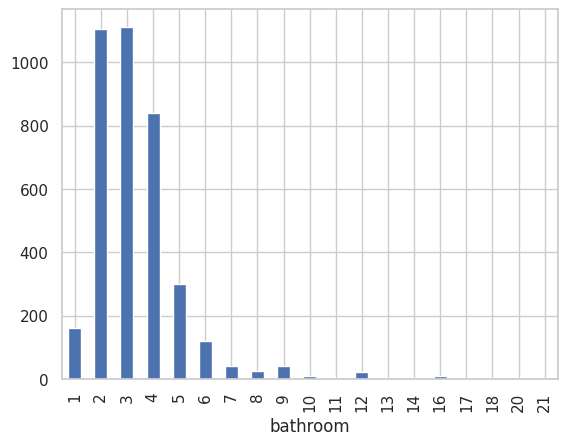

In [ ]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')


<Axes: ylabel='proportion'>

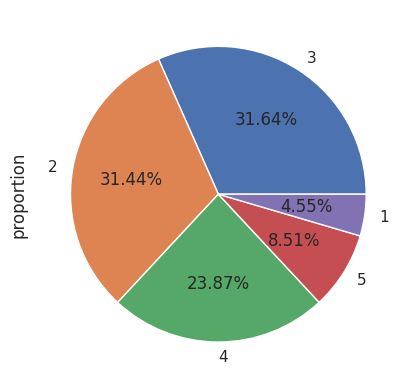

In [ ]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')


**Balcony**

<Axes: xlabel='balcony'>

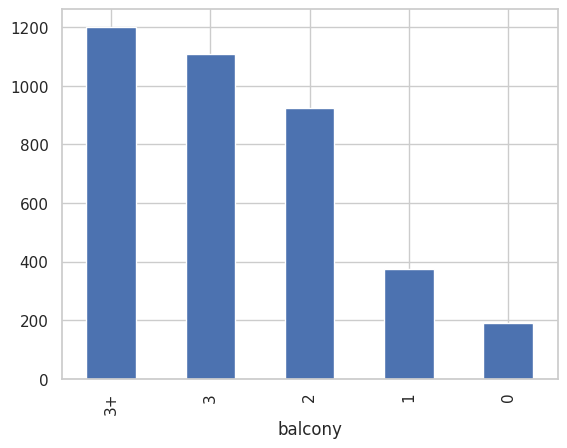

In [ ]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

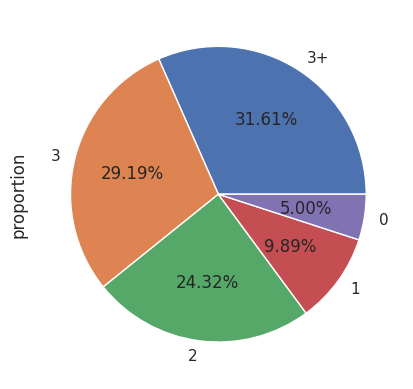

In [ ]:

df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')


**FloorNum**

In [ ]:
df['floorNum'].isnull().sum()

np.int64(19)

<Axes: xlabel='floorNum'>

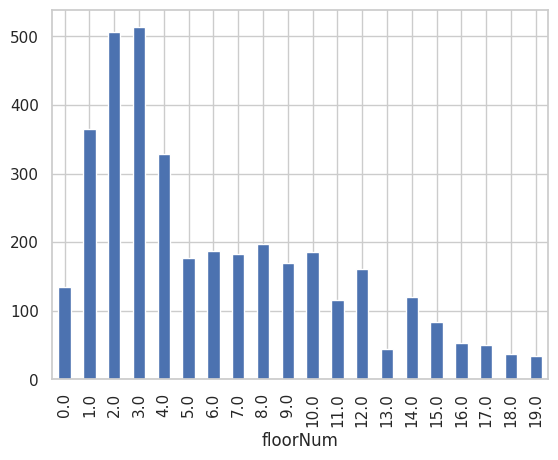

In [ ]:
df['floorNum'].value_counts().head(20).sort_index().plot(kind='bar')

In [ ]:
df['floorNum'].describe()

count    3784.000000
mean        6.810254
std         6.027555
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: ylabel='floorNum'>

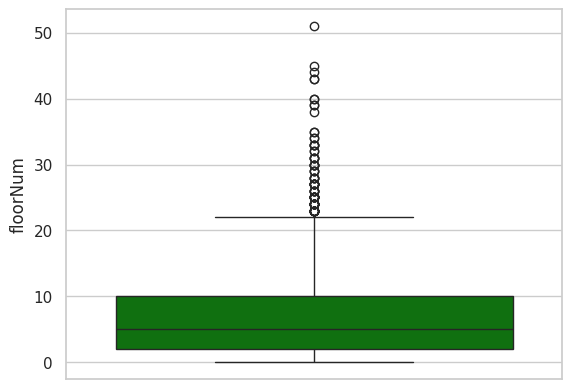

In [ ]:
sns.boxplot(df['floorNum'], color='green')

- Most properties are between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are common, with the 3rd floor being the most frequent.
- Higher floors have much lower frequency.
- Box plot shows concentration around lower floors (IQR between 2nd and 10th floors).
- Data points beyond the whiskers indicate potential outliers, especially on higher floors.


**Facing**

In [ ]:
df['facing'].isnull().sum()

np.int64(1105)

In [ ]:
df['facing'].value_counts()

facing
East          642
North-East    639
North         398
West          255
South         233
North-West    200
South-East    174
South-West    157
Name: count, dtype: int64

In [ ]:
# Add 'NA' to the categories of the 'facing' column
df['facing'] = df['facing'].cat.add_categories(['NA'])

# Now you can fill NaN values with 'NA'
df['facing'].fillna('NA', inplace=True)

<ipython-input-78-541544a0a000>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA', inplace=True)


In [ ]:
df['facing'].value_counts()

facing
NA            1105
East           642
North-East     639
North          398
West           255
South          233
North-West     200
South-East     174
South-West     157
Name: count, dtype: int64

**agePossesions**

In [ ]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

**Area **

In [ ]:
# super built up area
df['super_built_up_area'].isnull().sum()

np.int64(1888)

In [ ]:
df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

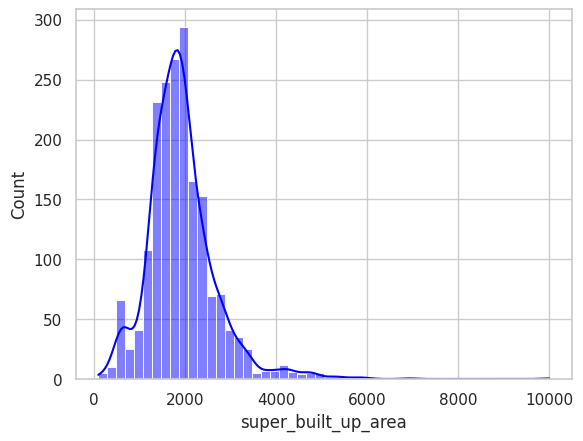

In [ ]:

sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='blue', kde=True)

<Axes: ylabel='super_built_up_area'>

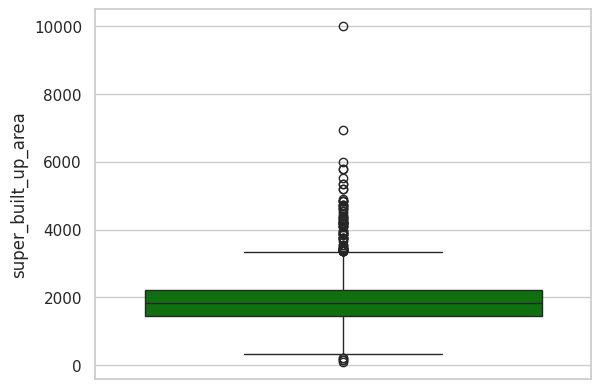

In [ ]:
sns.boxplot(df['super_built_up_area'].dropna(), color='green')

##### 📌 Super Built-Up Area Insights:
#####- Most properties range between 1,000 and 2,500 sq.ft.
#####- Distribution is right-skewed due to a few very large properties.
##### - IQR lies between ~1,480 and 2,215 sq.ft.
##### - Outliers exist with unusually large super built-up areas.


In [ ]:
# built up area
df['built_up_area'].isnull().sum()


np.int64(2070)

In [ ]:
df['built_up_area'].describe()


count      1733.000000
mean       2360.241413
std       17719.603378
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2399.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

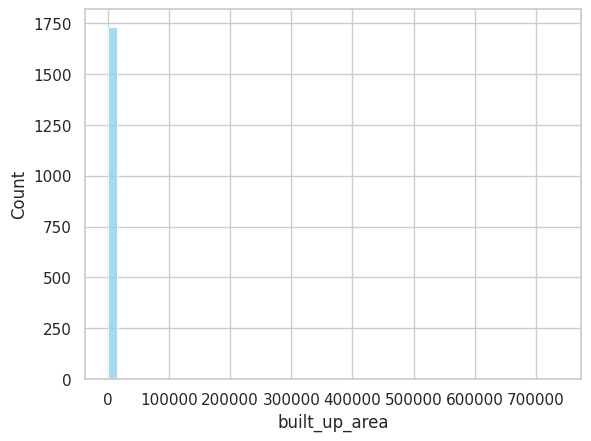

In [ ]:

sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='built_up_area'>

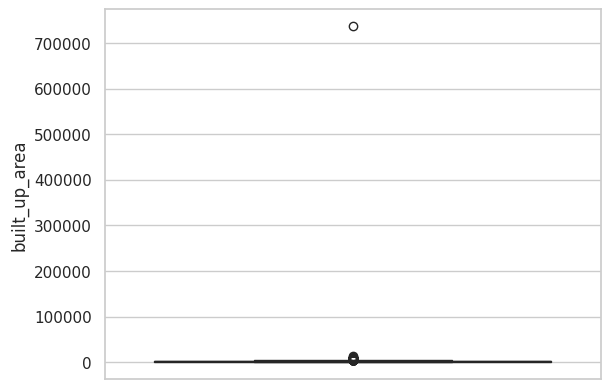

In [ ]:
sns.boxplot(df['built_up_area'].dropna(), color='green')

#####  Built-Up Area Insights:
##### - Most properties range from 500 to 3,500 sq.ft.
##### - Distribution is highly right-skewed due to few large properties.
##### - Box plot shows stretched whiskers and significant upper outliers.
###### - Extreme values may be outliers, data errors, or unusually large properties.


In [ ]:
# carpet area
df['carpet_area'].isnull().sum()

np.int64(1859)

In [ ]:
df['carpet_area'].describe()

count      1944.000000
mean       2483.466943
std       22375.239293
min          15.000000
25%         824.000000
50%        1294.000000
75%        1786.250000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

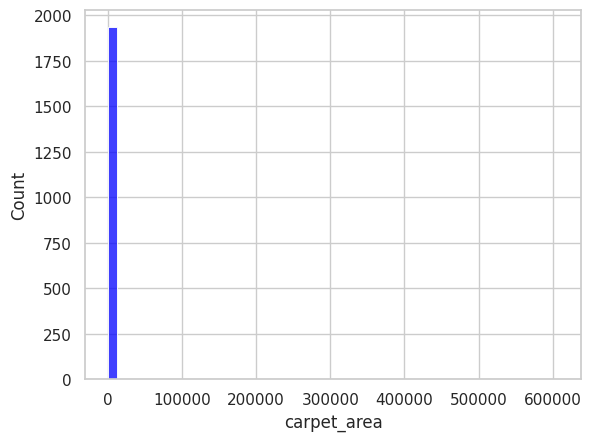

In [ ]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='blue', kde=False)

<Axes: ylabel='carpet_area'>

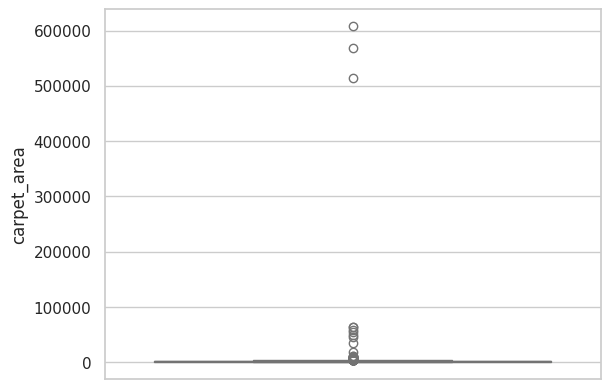

In [ ]:

sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

**additional Rooms*

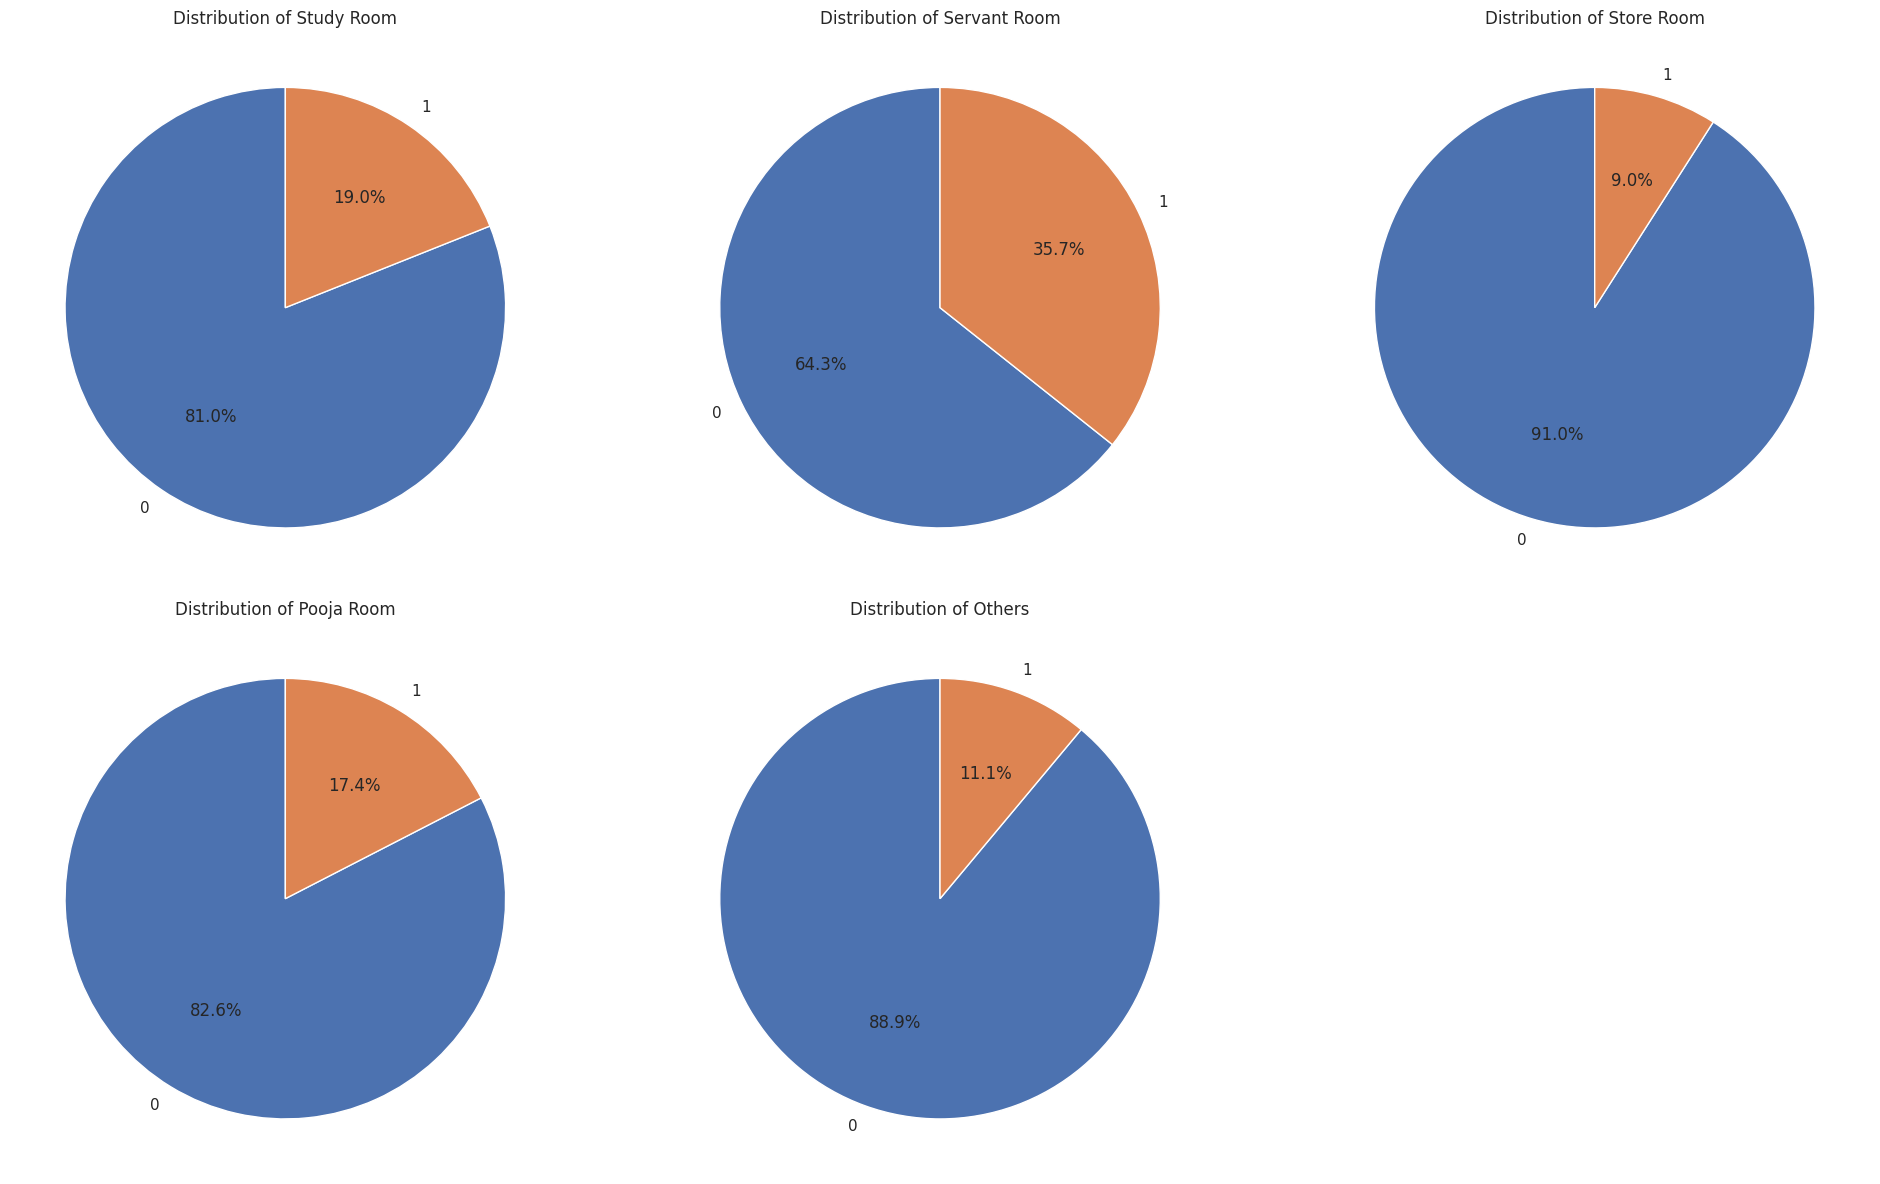

In [ ]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

**furnish type**

In [ ]:

df['furnishing_type'].value_counts()

furnishing_type
1    2534
2    1057
0     212
Name: count, dtype: int64

<Axes: ylabel='count'>

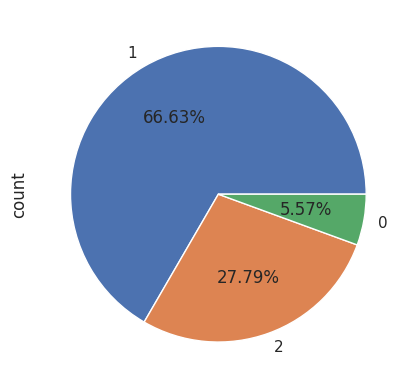

In [ ]:

df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

**Luxury Score**

In [ ]:
df['luxury_score'].isnull().sum()

np.int64(0)

In [ ]:
df['luxury_score'].describe()


count    3803.000000
mean       70.947936
std        52.821789
min         0.000000
25%        31.000000
50%        58.000000
75%       109.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

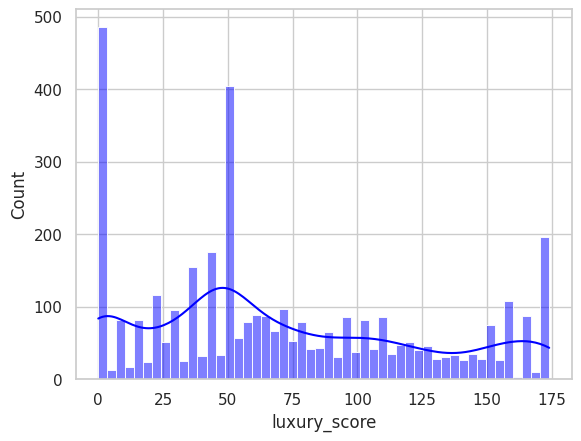

In [ ]:

sns.histplot(df['luxury_score'], bins=50, color='blue', kde=True)

<Axes: ylabel='luxury_score'>

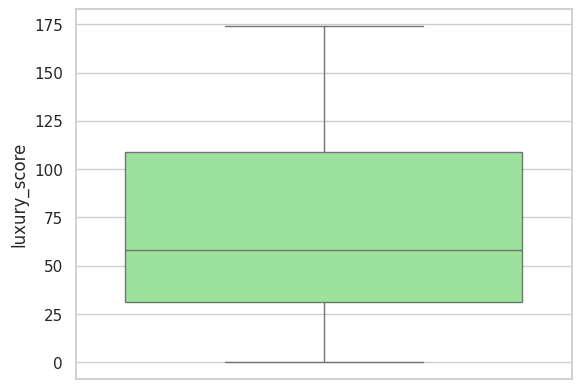

In [ ]:
sns.boxplot(df['luxury_score'], color='lightgreen')

## Multivariate Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




pd.set_option('display.max_columns', None)




df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()


**property type vs flate**

<ipython-input-107-47dc39169346>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


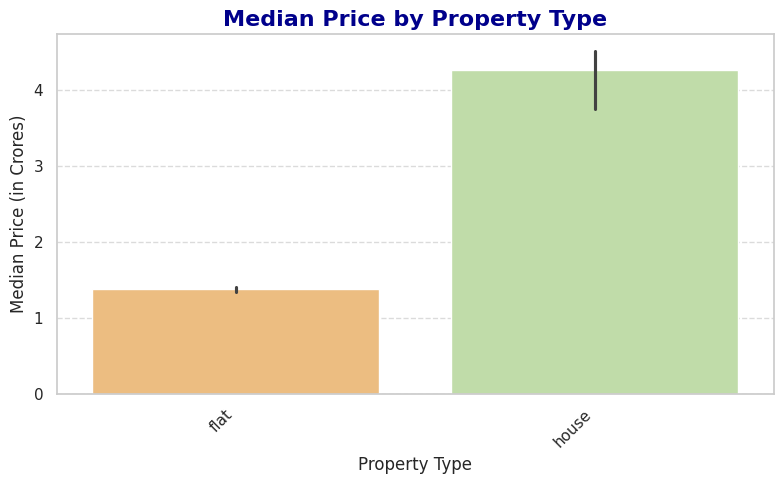

In [ ]:


plt.figure(figsize=(8,5))
palette = sns.color_palette("Spectral", len(df['property_type'].unique()))

sns.barplot(
    x='property_type',
    y='price',
    data=df,
    estimator=np.median,
    palette=palette
)

plt.title('Median Price by Property Type', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Median Price (in Crores)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<ipython-input-109-be254e1379e3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


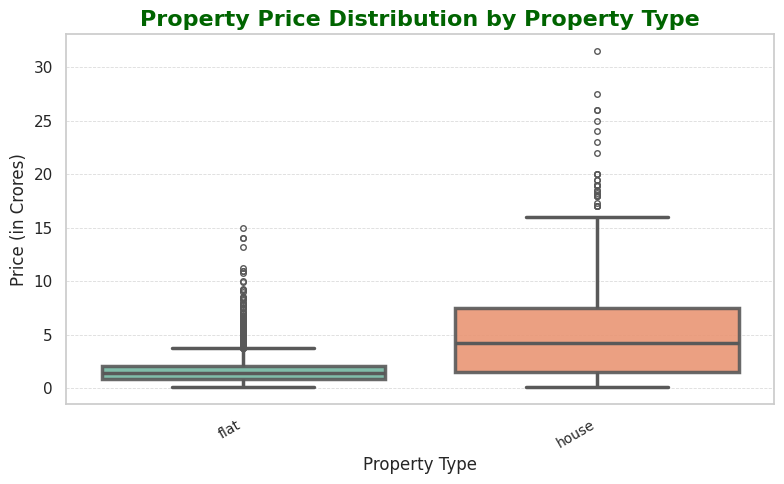

In [ ]:

plt.figure(figsize=(8,5))

# Use a creative palette
palette = sns.color_palette("Set2", len(df['property_type'].unique()))

# Create the boxplot
sns.boxplot(
    x='property_type',
    y='price',
    data=df,
    palette=palette,
    linewidth=2.5,
    fliersize=4,
    boxprops=dict(alpha=0.9)
)

# Improve aesthetics
plt.title('Property Price Distribution by Property Type', fontsize=16, weight='bold', color='darkgreen')
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Price (in Crores)', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.7)
plt.tight_layout()

plt.show()

**property type vs area**

<Axes: xlabel='property_type', ylabel='built_up_area'>

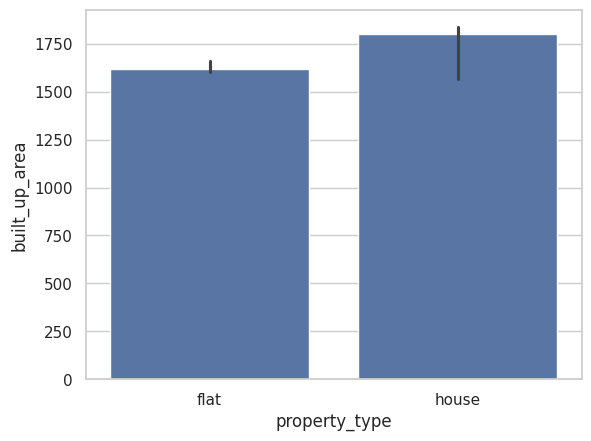

In [ ]:
sns.barplot(x=df['property_type'], y=df['built_up_area'], estimator=np.median)


<Axes: xlabel='property_type', ylabel='built_up_area'>

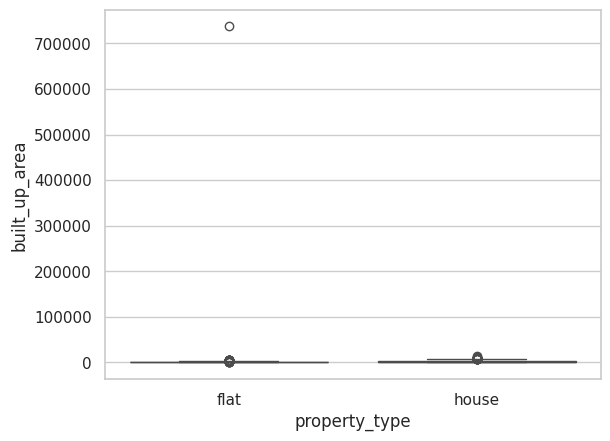

In [ ]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

In [ ]:
# removing that crazy outlier
df = df[df['built_up_area'] != 737147]

<ipython-input-114-5075b44ec46e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


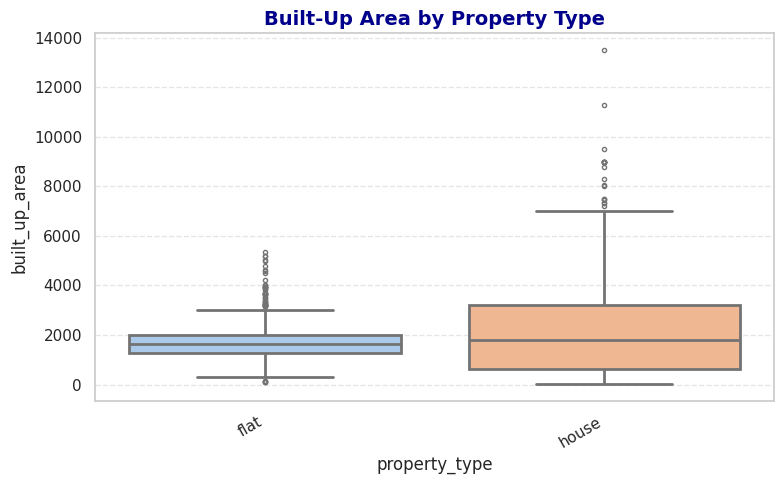

In [ ]:


plt.figure(figsize=(8, 5))
sns.boxplot(
    x='property_type',
    y='built_up_area',
    data=df,
    palette='pastel',   # Soft and creative colors
    linewidth=2,
    fliersize=3
)
plt.title('Built-Up Area by Property Type', fontsize=14, weight='bold', color='darkblue')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



**property_type vs price_per_sqft**

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

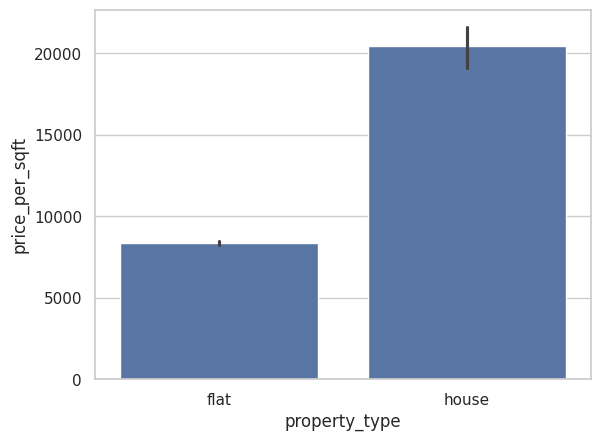

In [ ]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

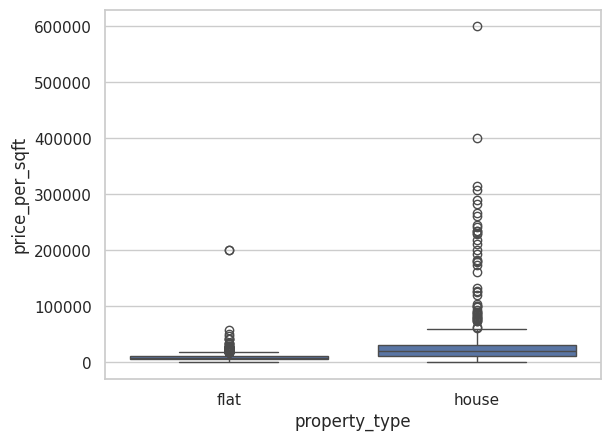

In [ ]:

sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])

In [ ]:
# check outliers
df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]


property_type                      society     sector  price  \
229          house                    rk excelo  sector 12   0.60   
336          house                  independent  sector 28   4.50   
342          house  unitech nirvana birch court  sector 50   7.10   
545          house                  independent  sector 24  10.00   
867          house                   ardee city  sector 52   5.50   
975          house               uppal southend  sector 49   6.75   
1027         house                dlf the grove  sector 54   5.70   
1062         house                  independent  sector 23   2.80   
1259         house           vipul tatvam villa  sector 48   7.25   
1385         house     unitech uniworld resorts  sector 33   9.50   
1628         house         eros rosewood villas  sector 49   2.75   
1925         house                  independent   sector 4   0.60   
2004         house                  independent  sector 17   3.50   
2047         house                        ansal  sector 43   1.85   
2088         house                  independent  sector 12   3.50   
2161         house       dlf city plots phase 2  sector 25  10.50   
2277         house                  independent  sector 55   1.45   
2418          flat           ambience caitriona  sector 24  14.00   
2461         house                  independent  sector 12   6.00   
2738         house            vatika india next  sector 82   7.00   
2850         house       dlf city plots phase 2  sector 25  10.00   
3015         house       unitech deerwood chase  sector 50   8.45   
3046         house       emaar the palm springs  sector 54  24.00   
3090          flat           ambience caitriona  sector 24  14.00   
3148         house         bhim nagar, sector 6   sector 6   0.85   
3279         house     unitech uniworld resorts  sector 33  10.00   
3356         house                  independent  sector 54   3.75   
3386         house                  independent  sector 38   8.00   
3449         house                  independent  sector 57   8.00   
3519         house          huda plot sector 38  sector 38   4.30   

      price_per_sqft   area  \
229         120000.0   50.0   
336         125000.0  360.0   
342         283333.0  251.0   
545         229885.0  435.0   
867         183333.0  300.0   
975         290948.0  232.0   
1027        211111.0  270.0   
1062        161849.0  173.0   
1259        201388.0  360.0   
1385        173992.0  546.0   
1628        178571.0  154.0   
1925        105263.0   57.0   
2004        218750.0  160.0   
2047        308333.0   60.0   
2088        133079.0  263.0   
2161        261194.0  402.0   
2277        241666.0   60.0   
2418        200000.0  700.0   
2461        315789.0  190.0   
2738        194444.0  360.0   
2850        400000.0  250.0   
3015        235376.0  359.0   
3046        600000.0  400.0   
3090        200000.0  700.0   
3148        126865.0   67.0   
3279        181818.0  550.0   
3356        234375.0  160.0   
3386        230547.0  347.0   
3449        266666.0  300.0   
3519        245398.0  175.0   

                                           areaWithType  super_built_up_area  \
229   Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...                  NaN   
336                    Built Up area: 360 (33.45 sq.m.)                  NaN   
342                           Plot area 240(22.3 sq.m.)                  NaN   
545                      Carpet area: 435 (40.41 sq.m.)                  NaN   
867                          Plot area 300(27.87 sq.m.)                  NaN   
975                          Plot area 232(21.55 sq.m.)                  NaN   
1027                   Built Up area: 270 (25.08 sq.m.)                  NaN   
1062  Plot area 173(16.07 sq.m.)Built Up area: 160 s...                  NaN   
1259                         Plot area 360(33.45 sq.m.)                  NaN   
1385                         Plot area 546(50.73 sq.m.)                  NaN   
1628  Plot area 154(14.

<Axes: xlabel='bedRoom', ylabel='property_type'>

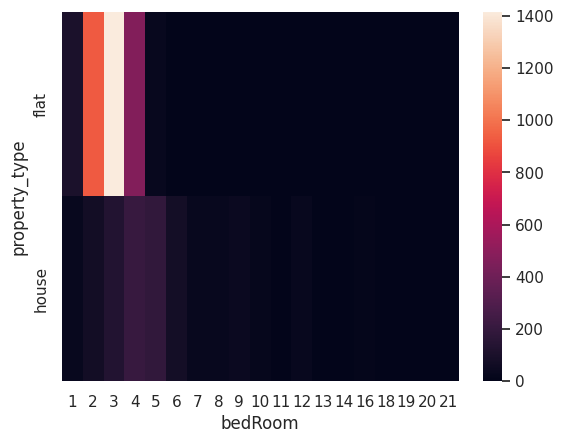

In [ ]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))

<Axes: xlabel='property_type', ylabel='floorNum'>

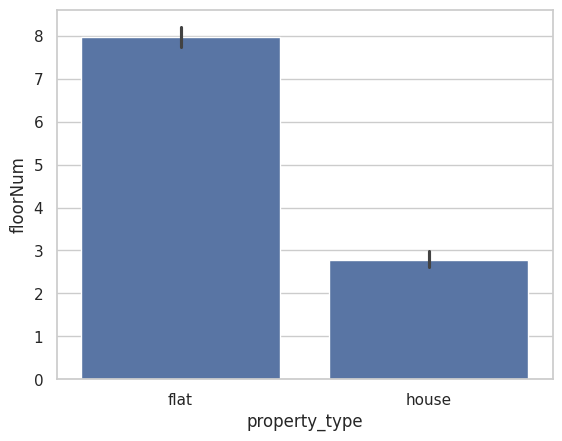

In [ ]:
sns.barplot(x=df['property_type'],y=df['floorNum'])

<Axes: xlabel='property_type', ylabel='floorNum'>

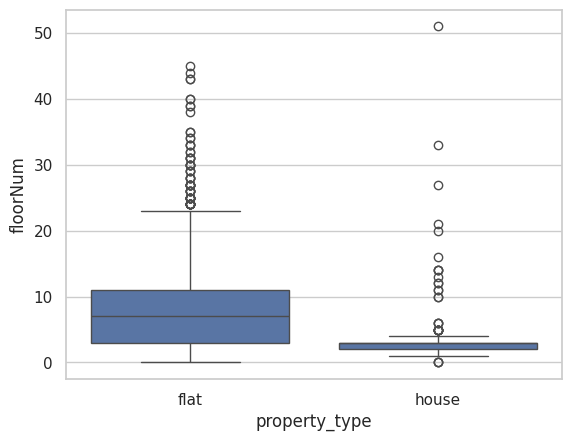

In [ ]:
sns.boxplot(x=df['property_type'],y=df['floorNum'])

In [ ]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat                pyramid elite   sector 86   0.46   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   

   price_per_sqft     area                                       areaWithType  \
0          7585.0   1081.0  Super Built up area 1081(100.43 sq.m.)Carpet a...   
1          8600.0   1105.0                   Carpet area: 1103 (102.47 sq.m.)   
2            79.0  58228.0                 Carpet area: 58141 (5401.48 sq.m.)   
3          5470.0    585.0  Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...   
4          8020.0   1995.0  Super Built up area 1995(185.34 sq.m.)Built Up...   

   bedRoom  bathroom balcony  ...  super_built_up_area built_up_area  \
0        3         2       2  ...               1081.0           NaN   
1        2         2       2  ...                  NaN           NaN   
2        2         2       1  ...                  NaN           NaN   
3        2         2       1  ...                  NaN        1000.0   
4        3         4      3+  ...               1995.0        1615.0   

  carpet_area  study room  servant room  store room  pooja room  others  \
0       650.0           0             0           0           0       0   
1      1103.0           1             1           0           0       0   
2     58141.0           0             0           0           0       0   
3       585.0           0             0           0           0       0   
4      1476.0           0             1           0           0       1   

   furnishing_type  luxury_score  
0                1             8  
1                1            38  
2                1            15  
3                1            49  
4                2           174  

[5 rows x 23 columns]

<Axes: xlabel='agePossession', ylabel='property_type'>

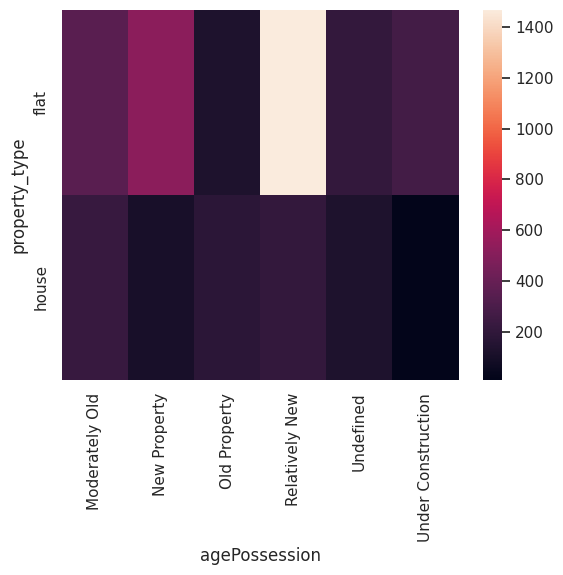

In [ ]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))

<Axes: xlabel='agePossession', ylabel='property_type'>

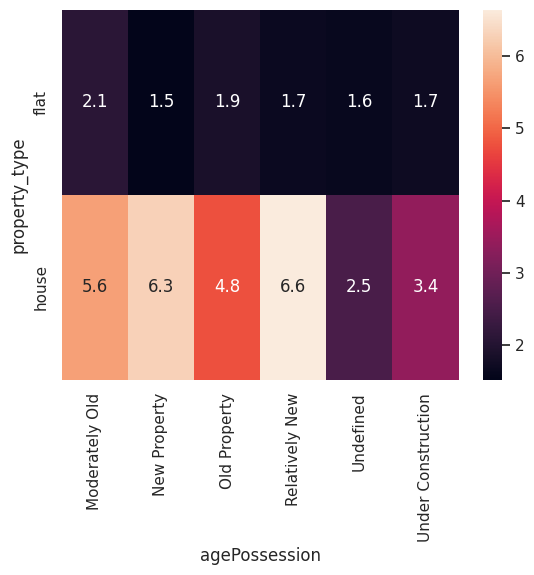

In [ ]:

sns.heatmap(pd.pivot_table(df,index='property_type',columns='agePossession',values='price',aggfunc='mean'),annot=True)


<Axes: xlabel='bedRoom', ylabel='property_type'>

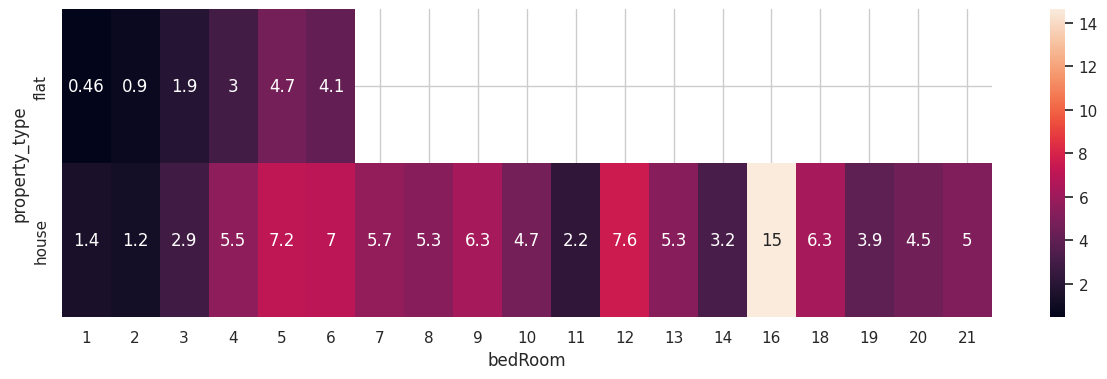

In [ ]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)


<Axes: xlabel='furnishing_type', ylabel='property_type'>

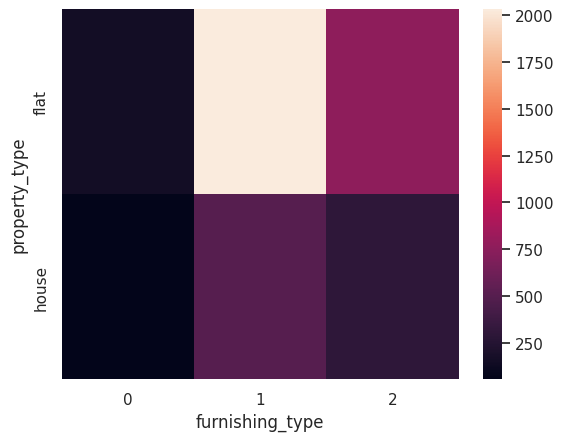

In [ ]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))


<Axes: xlabel='furnishing_type', ylabel='property_type'>

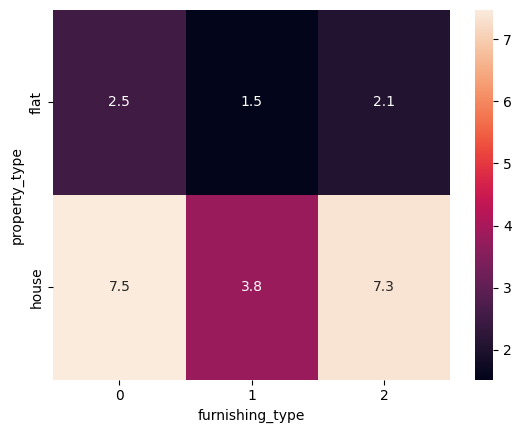

In [ ]:

sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)


<ipython-input-4-36426bb75571>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


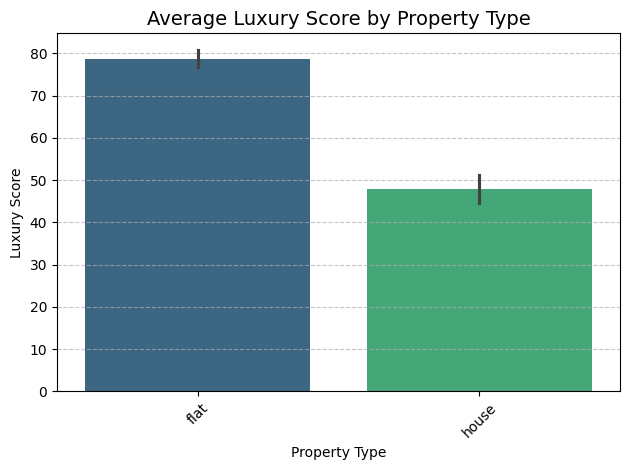

In [ ]:

sns.barplot(
    x='property_type',
    y='luxury_score',
    data=df,
    palette='viridis'  # you can try 'Set2', 'coolwarm', 'magma', etc.
)
plt.title("Average Luxury Score by Property Type", fontsize=14)
plt.xlabel("Property Type")
plt.ylabel("Luxury Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Axes: xlabel='property_type', ylabel='luxury_score'>

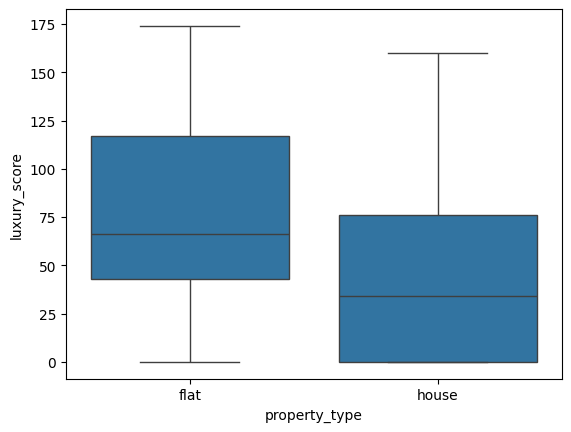

In [ ]:
sns.boxplot(x=df['property_type'],y=df['luxury_score'])


<Axes: xlabel='sector', ylabel='property_type'>

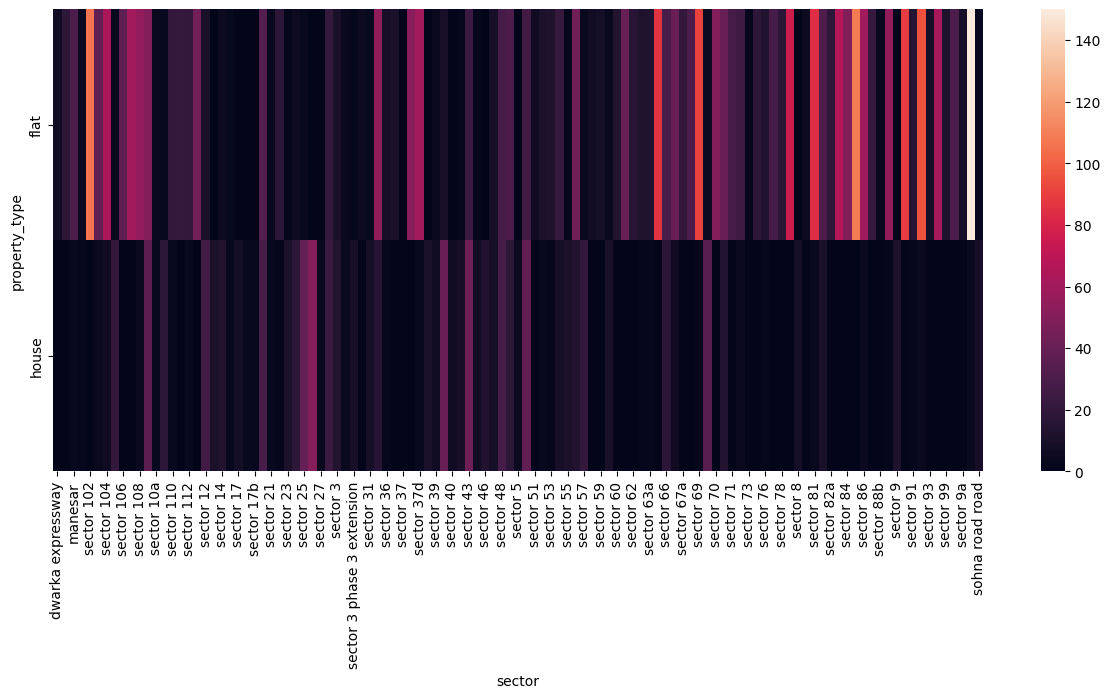

In [ ]:

# sector analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['property_type'],df['sector'].sort_index()))


<ipython-input-12-89cab389b1df>:51: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


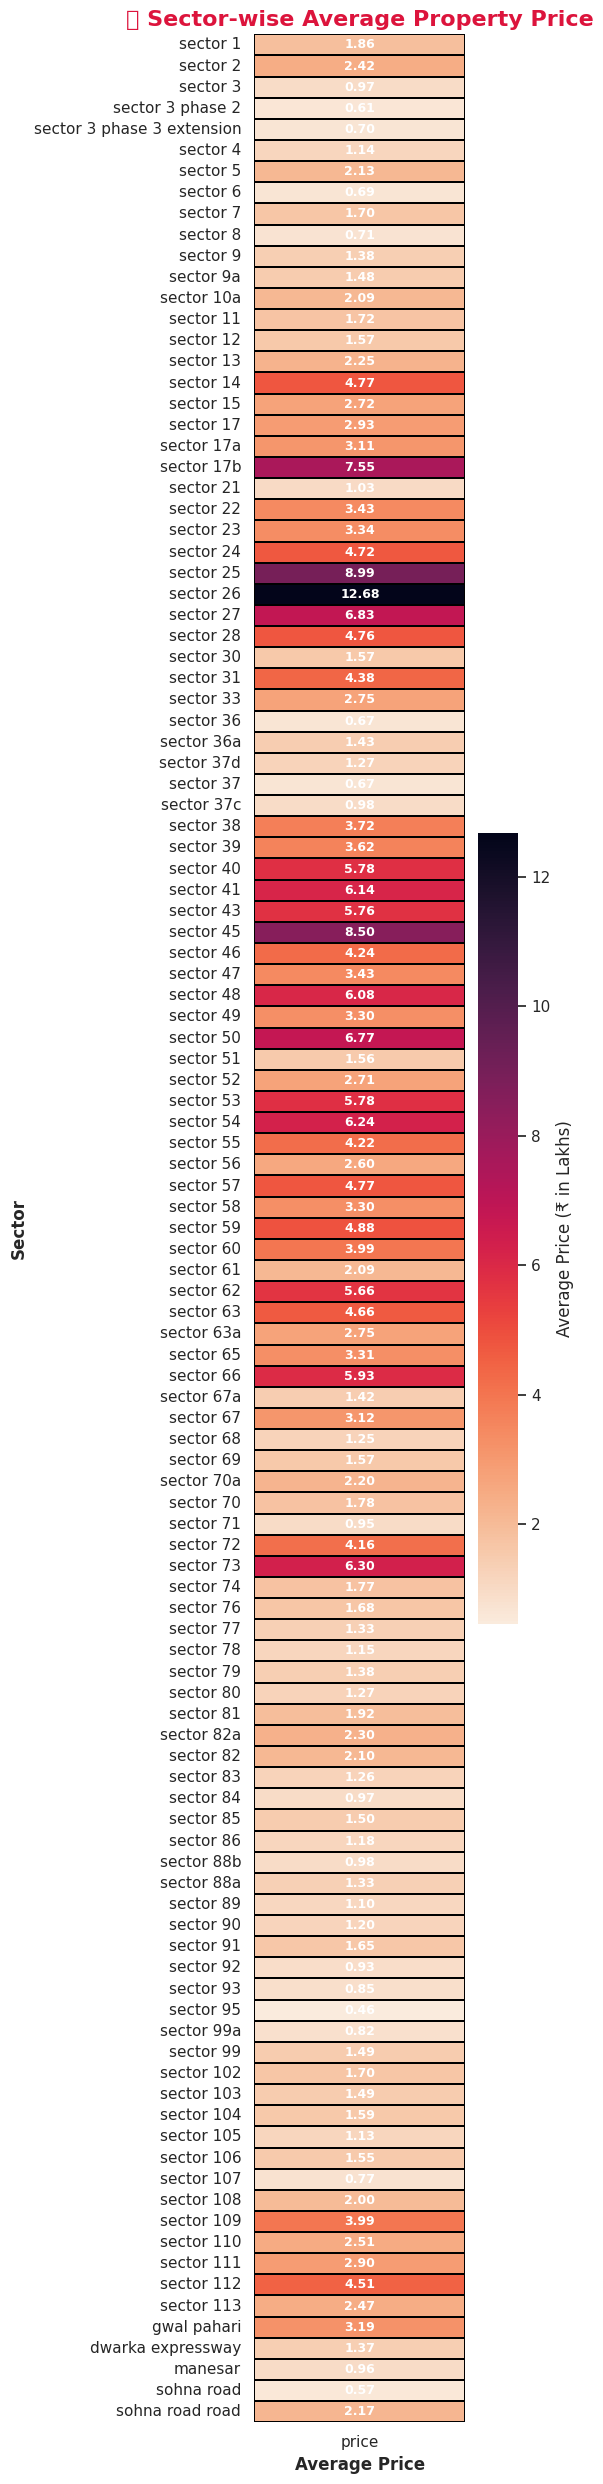

In [ ]:
## SECTOR ANALYSIS
import re


## groupby sector and calculate avg price

avg_price_per_sector=df.groupby('sector')['price'].mean().reset_index()

## function to extract sector number

def extract_sector_num(sector_name):
    match=re.search(r'\d+',sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')



avg_price_per_sector['sector_num']=avg_price_per_sector['sector'].apply(extract_sector_num)
avg_price_per_sector_sorted_by_sector=avg_price_per_sector.sort_values(by='sector_num')

## plot the heatmap

# Set style
sns.set(style="darkgrid")

# Use a vivid and modern colormap
cmap = sns.color_palette("rocket_r", as_cmap=True)

# Create the figure
plt.figure(figsize=(6, 25))

# Plot the heatmap
sns.heatmap(
    avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']],
    annot=True,
    fmt=".2f",
    linewidths=1.2,
    linecolor='black',
    cmap=cmap,
    cbar_kws={'label': 'Average Price (₹ in Lakhs)', 'shrink': 0.8},
    annot_kws={"size": 9, "weight": "bold", "color": "white"}
)

# Titles and labels
plt.title('📊 Sector-wise Average Property Price', fontsize=16, weight='bold', color='crimson')
plt.xlabel('Average Price', fontsize=12, weight='bold')
plt.ylabel('Sector', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


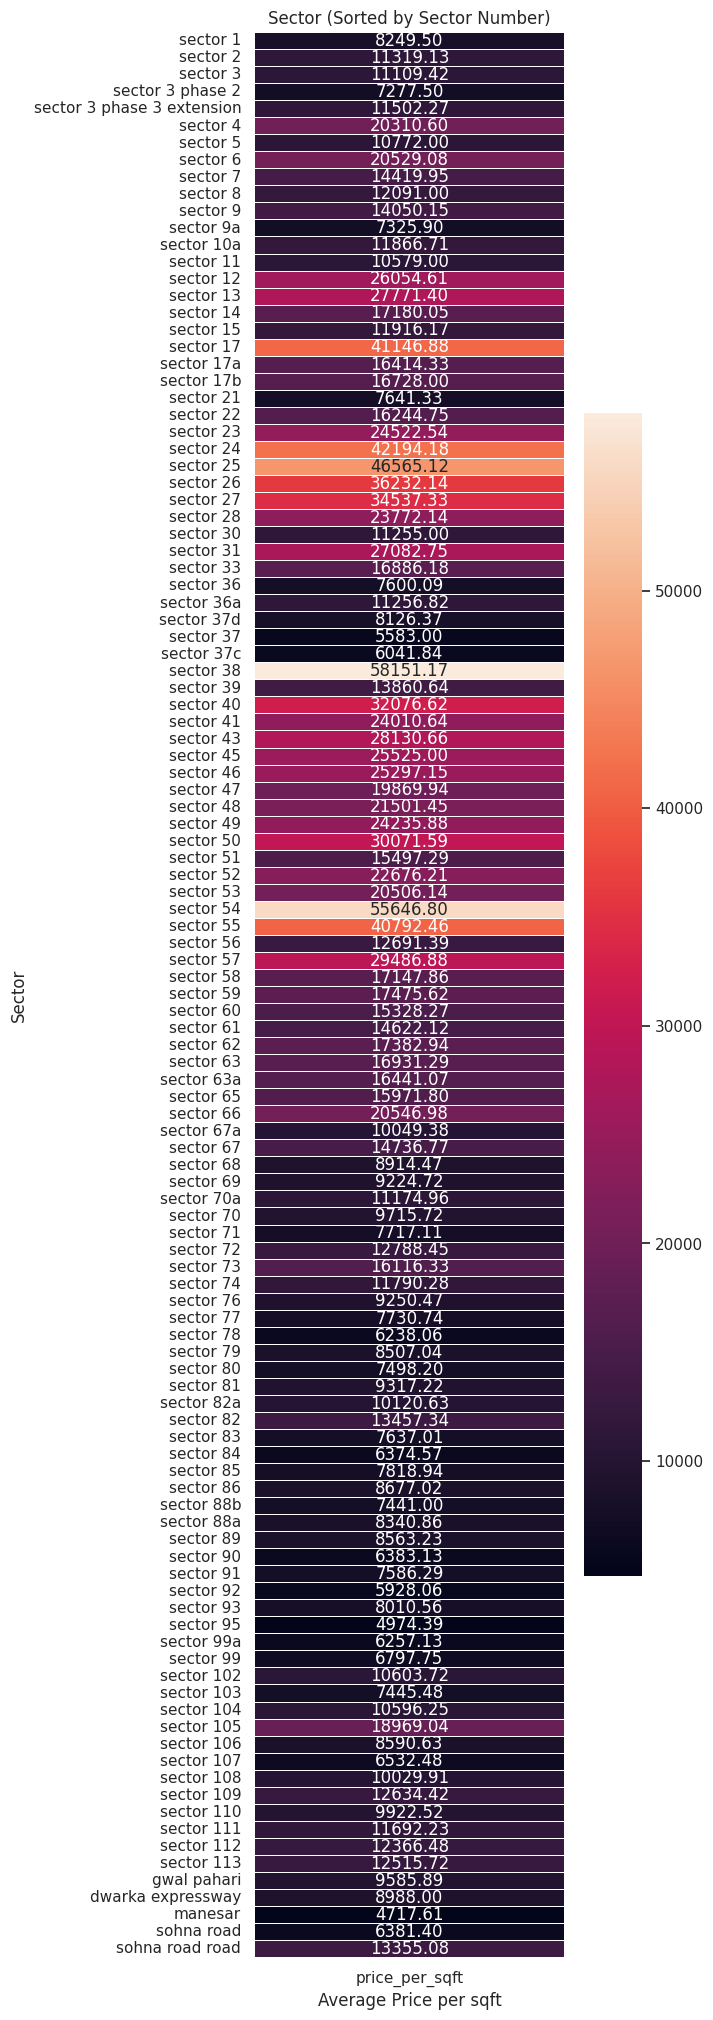

In [ ]:

avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_num)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

<ipython-input-16-baed4b2853ea>:37: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


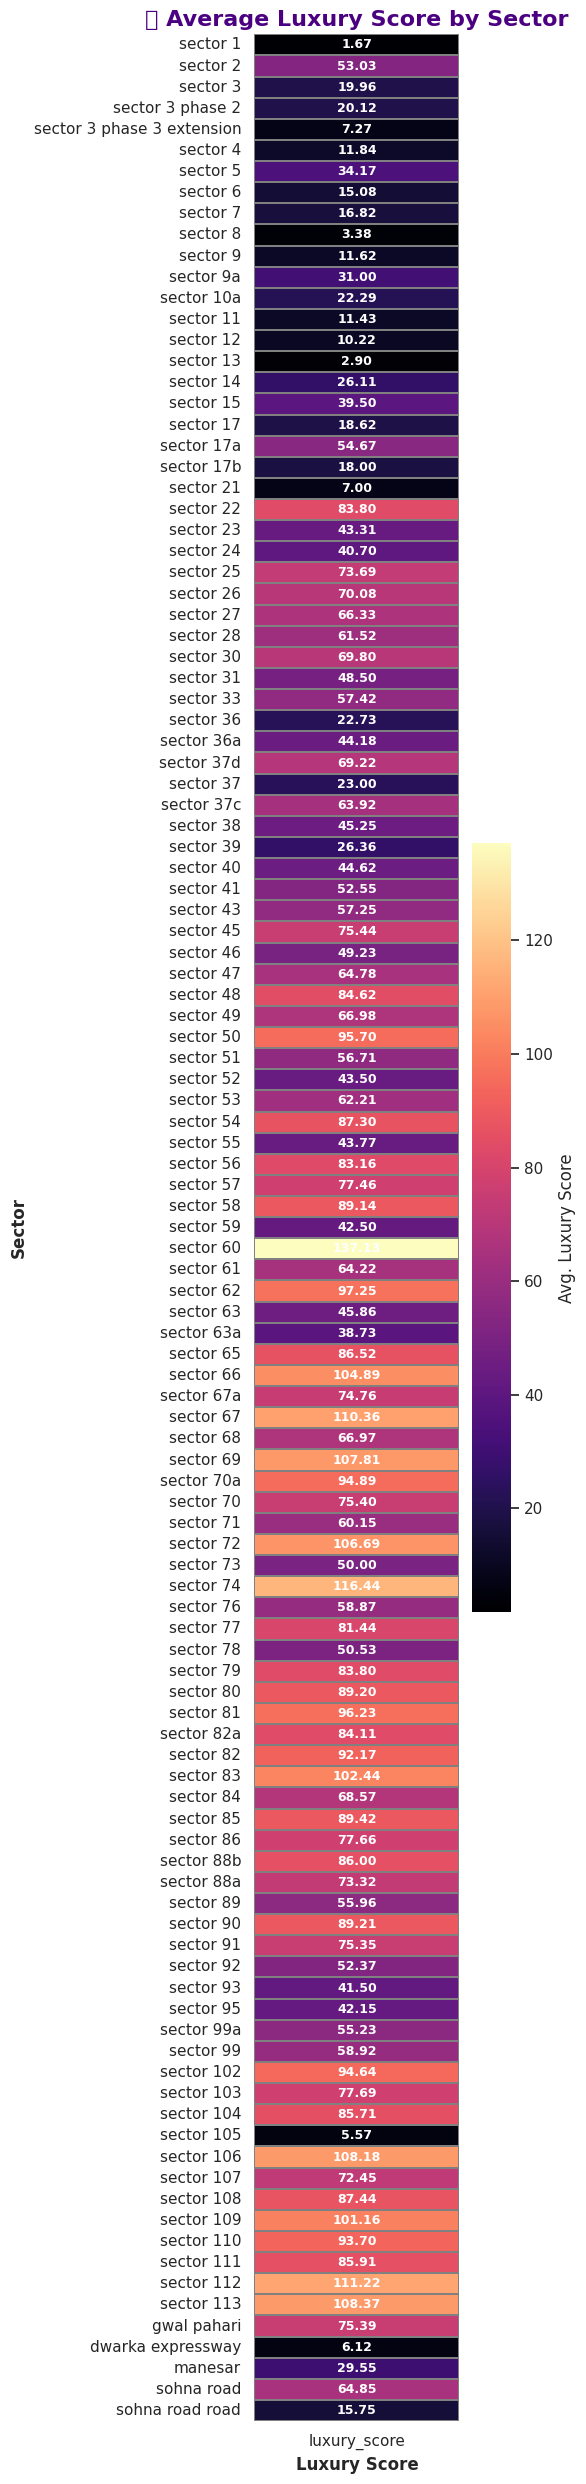

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_num)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')
# Set Seaborn style
sns.set(style="whitegrid")

# Choose a visually appealing colormap
cmap = sns.color_palette("magma", as_cmap=True)

# Create figure
plt.figure(figsize=(6, 25))

# Plot heatmap
sns.heatmap(
    luxury_score_sector.set_index('sector')[['luxury_score']],
    annot=True,
    fmt=".2f",
    cmap=cmap,
    linewidths=1.2,
    linecolor='gray',
    cbar_kws={'label': 'Avg. Luxury Score', 'shrink': 0.7},
    annot_kws={"size": 9, "weight": "bold", "color": "white"}
)

# Set titles and labels
plt.title('🌟 Average Luxury Score by Sector', fontsize=16, weight='bold', color='indigo')
plt.xlabel('Luxury Score', fontsize=12, weight='bold')
plt.ylabel('Sector', fontsize=12, weight='bold')

# Tidy layout
plt.tight_layout()
plt.show()


##price

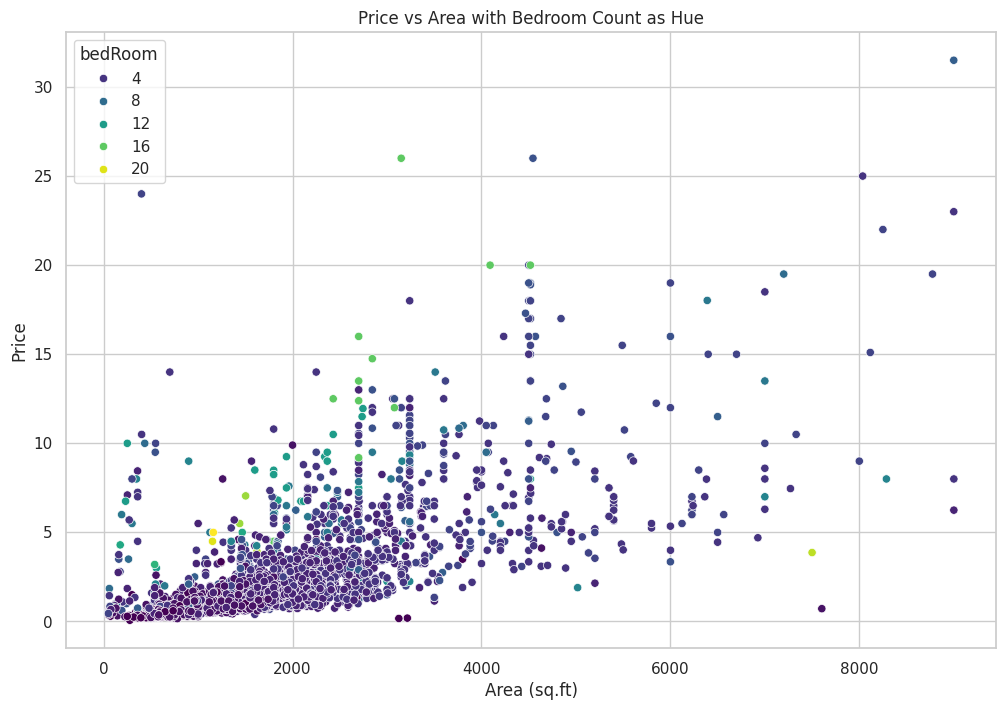

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=df[df['area'] < 10000]['area'],
    y=df[df['area'] < 10000]['price'],
    hue=df[df['area'] < 10000]['bedRoom'],
    palette='viridis'
)
plt.title("Price vs Area with Bedroom Count as Hue")
plt.xlabel("Area (sq.ft)")
plt.ylabel("Price")
plt.show()


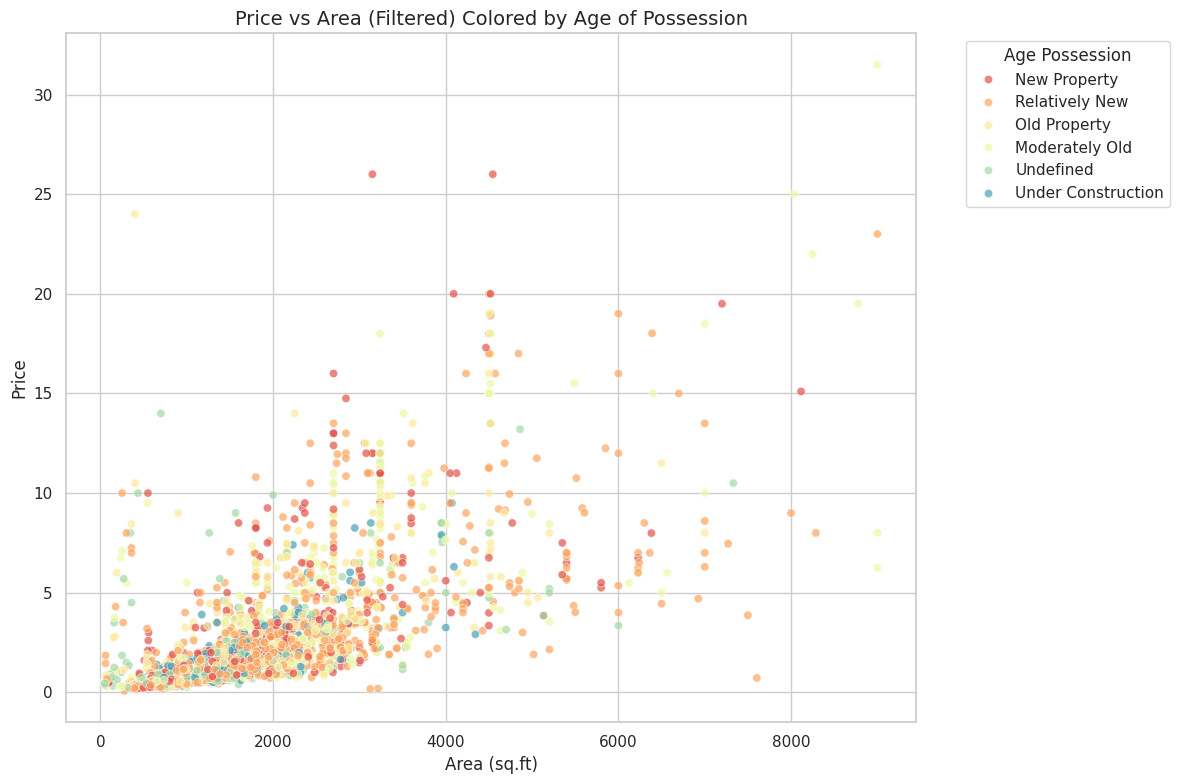

In [ ]:
plt.figure(figsize=(12,8))
filtered_df = df[df['area'] < 10000]

sns.scatterplot(
    x=filtered_df['area'],
    y=filtered_df['price'],
    hue=filtered_df['agePossession'],
    palette='Spectral',  # visually appealing color palette
    alpha=0.7,            # slightly transparent points
    edgecolor='w'         # white edge for clarity
)

plt.title("Price vs Area (Filtered) Colored by Age of Possession", fontsize=14)
plt.xlabel("Area (sq.ft)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(title='Age Possession', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


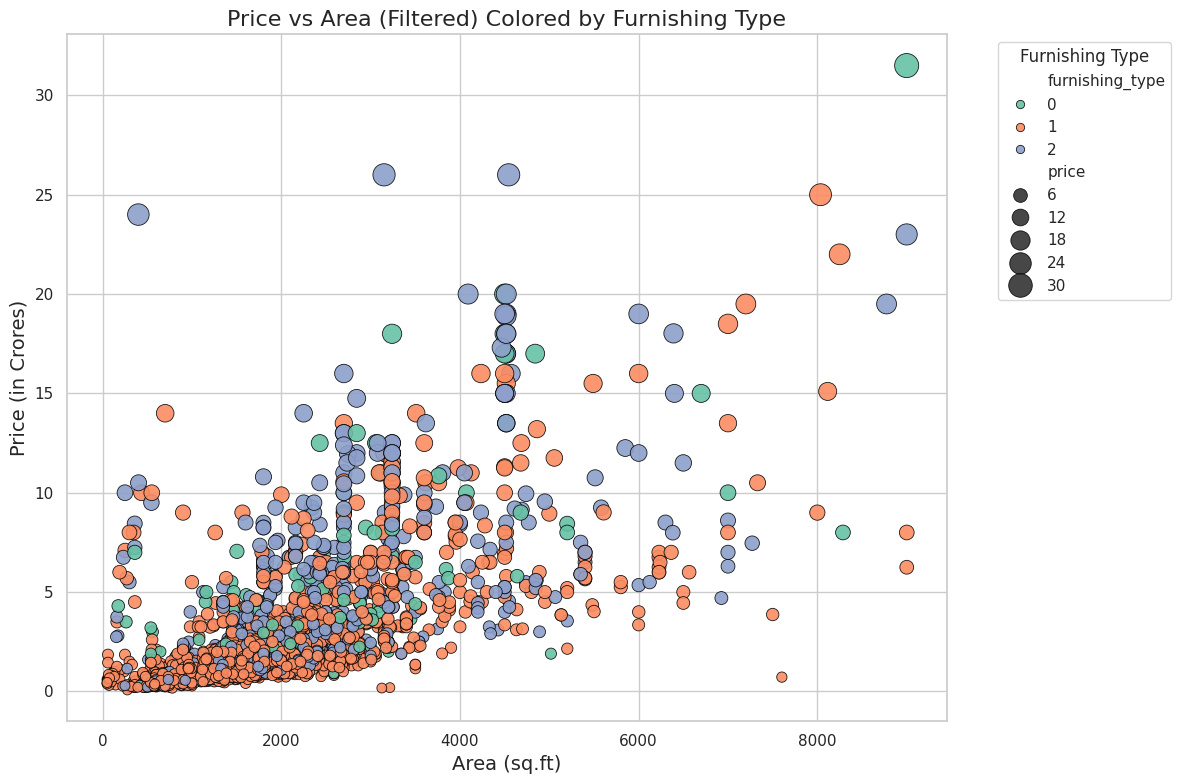

In [ ]:
plt.figure(figsize=(12,8))

# Filter the dataset where area < 10000
filtered_df = df[df['area'] < 10000]

# Create the scatter plot with adjustments
sns.scatterplot(
    x=filtered_df['area'],
    y=filtered_df['price'],
    hue=filtered_df['furnishing_type'].astype('category'),
    palette='Set2',  # A different color palette for better distinction
    size=filtered_df['price'],  # Vary point size based on price to show relative magnitude
    sizes=(50, 300),  # Control the range of point sizes
    alpha=0.9,         # Reduce transparency to make the points more visible
    marker='o',        # Change marker style to circle for clarity
    edgecolor='black', # Black edge color for better separation
)

# Add labels and title
plt.title("Price vs Area (Filtered) Colored by Furnishing Type", fontsize=16)
plt.xlabel("Area (sq.ft)", fontsize=14)
plt.ylabel("Price (in Crores)", fontsize=14)

# Improve the legend
plt.legend(title='Furnishing Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout and add a grid
plt.tight_layout()
plt.grid(True)

# Show plot
plt.show()


<Axes: xlabel='bedRoom', ylabel='price'>

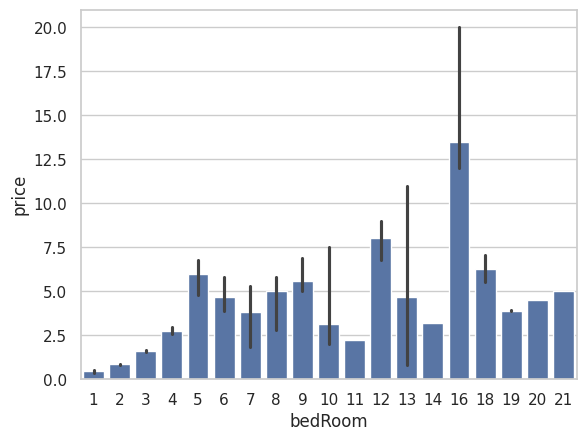

In [ ]:
sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.median)


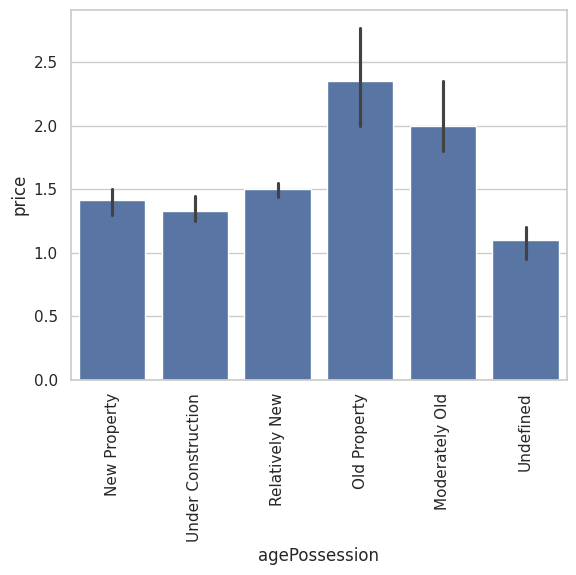

In [ ]:

sns.barplot(x=df['agePossession'],y=df['price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()




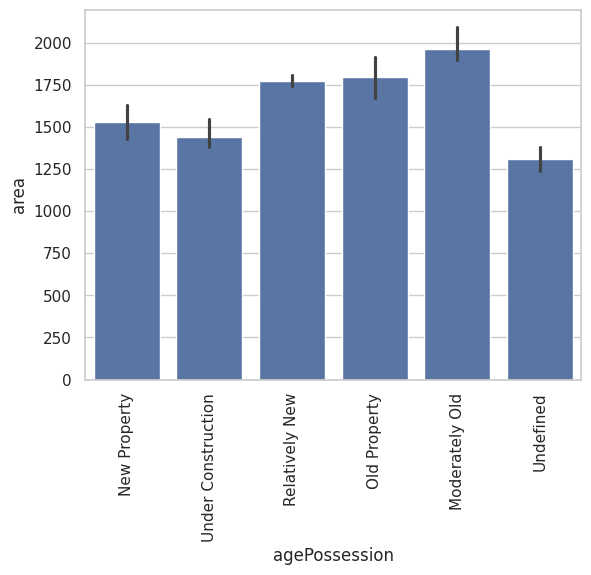

In [ ]:

sns.barplot(x=df['agePossession'],y=df['area'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()


<Axes: xlabel='furnishing_type', ylabel='price'>

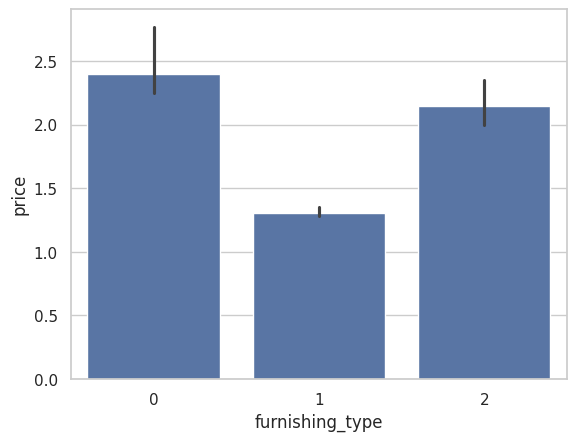

In [ ]:

sns.barplot(x=df['furnishing_type'],y=df['price'],estimator=np.median)

<Axes: xlabel='luxury_score', ylabel='price'>

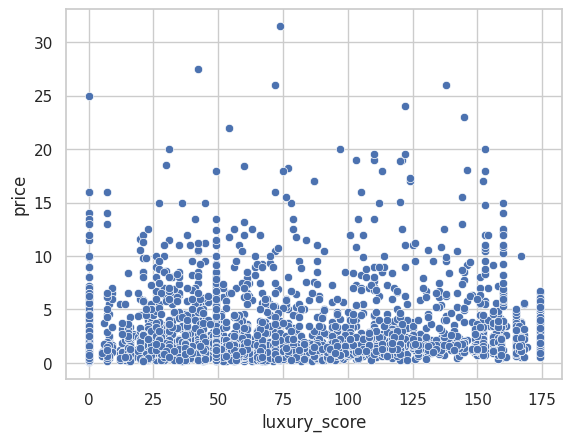

In [ ]:

sns.scatterplot(x=df['luxury_score'],y=df['price'])

##correlation

<Axes: >

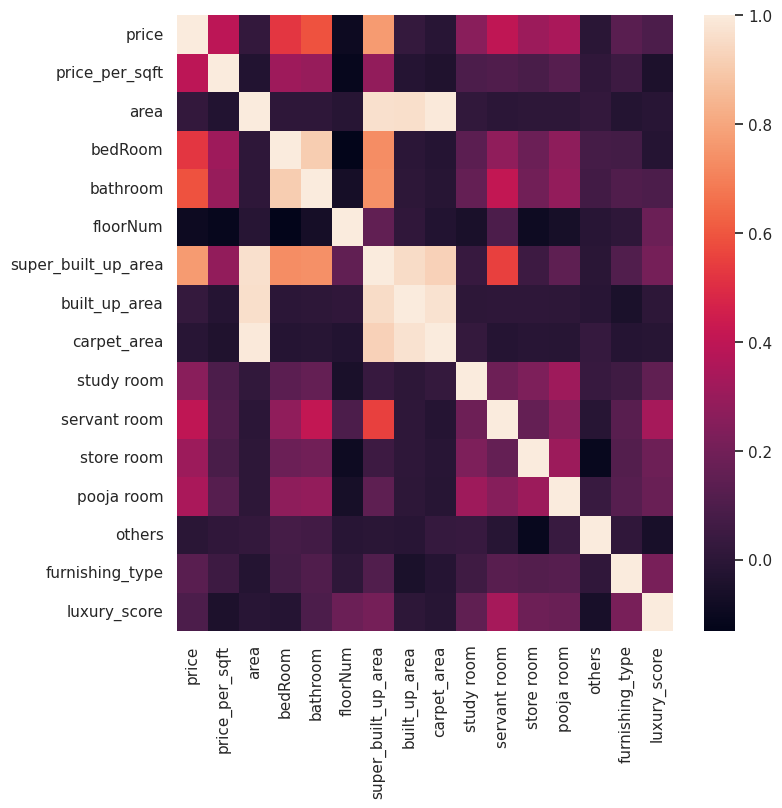

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(include=np.number).corr()) # Select only numeric columns for correlation


In [ ]:
numeric_features = df.select_dtypes(include=np.number)
price_corr = numeric_features.corr()['price'].sort_values(ascending=False)
print(price_corr)

price                  1.000000
super_built_up_area    0.769412
bathroom               0.589886
bedRoom                0.522993
servant room           0.401017
price_per_sqft         0.391323
pooja room             0.341550
store room             0.309158
study room             0.258672
furnishing_type        0.133772
luxury_score           0.094869
built_up_area          0.024103
area                   0.019634
others                -0.003455
carpet_area           -0.011344
floorNum              -0.094322
Name: price, dtype: float64


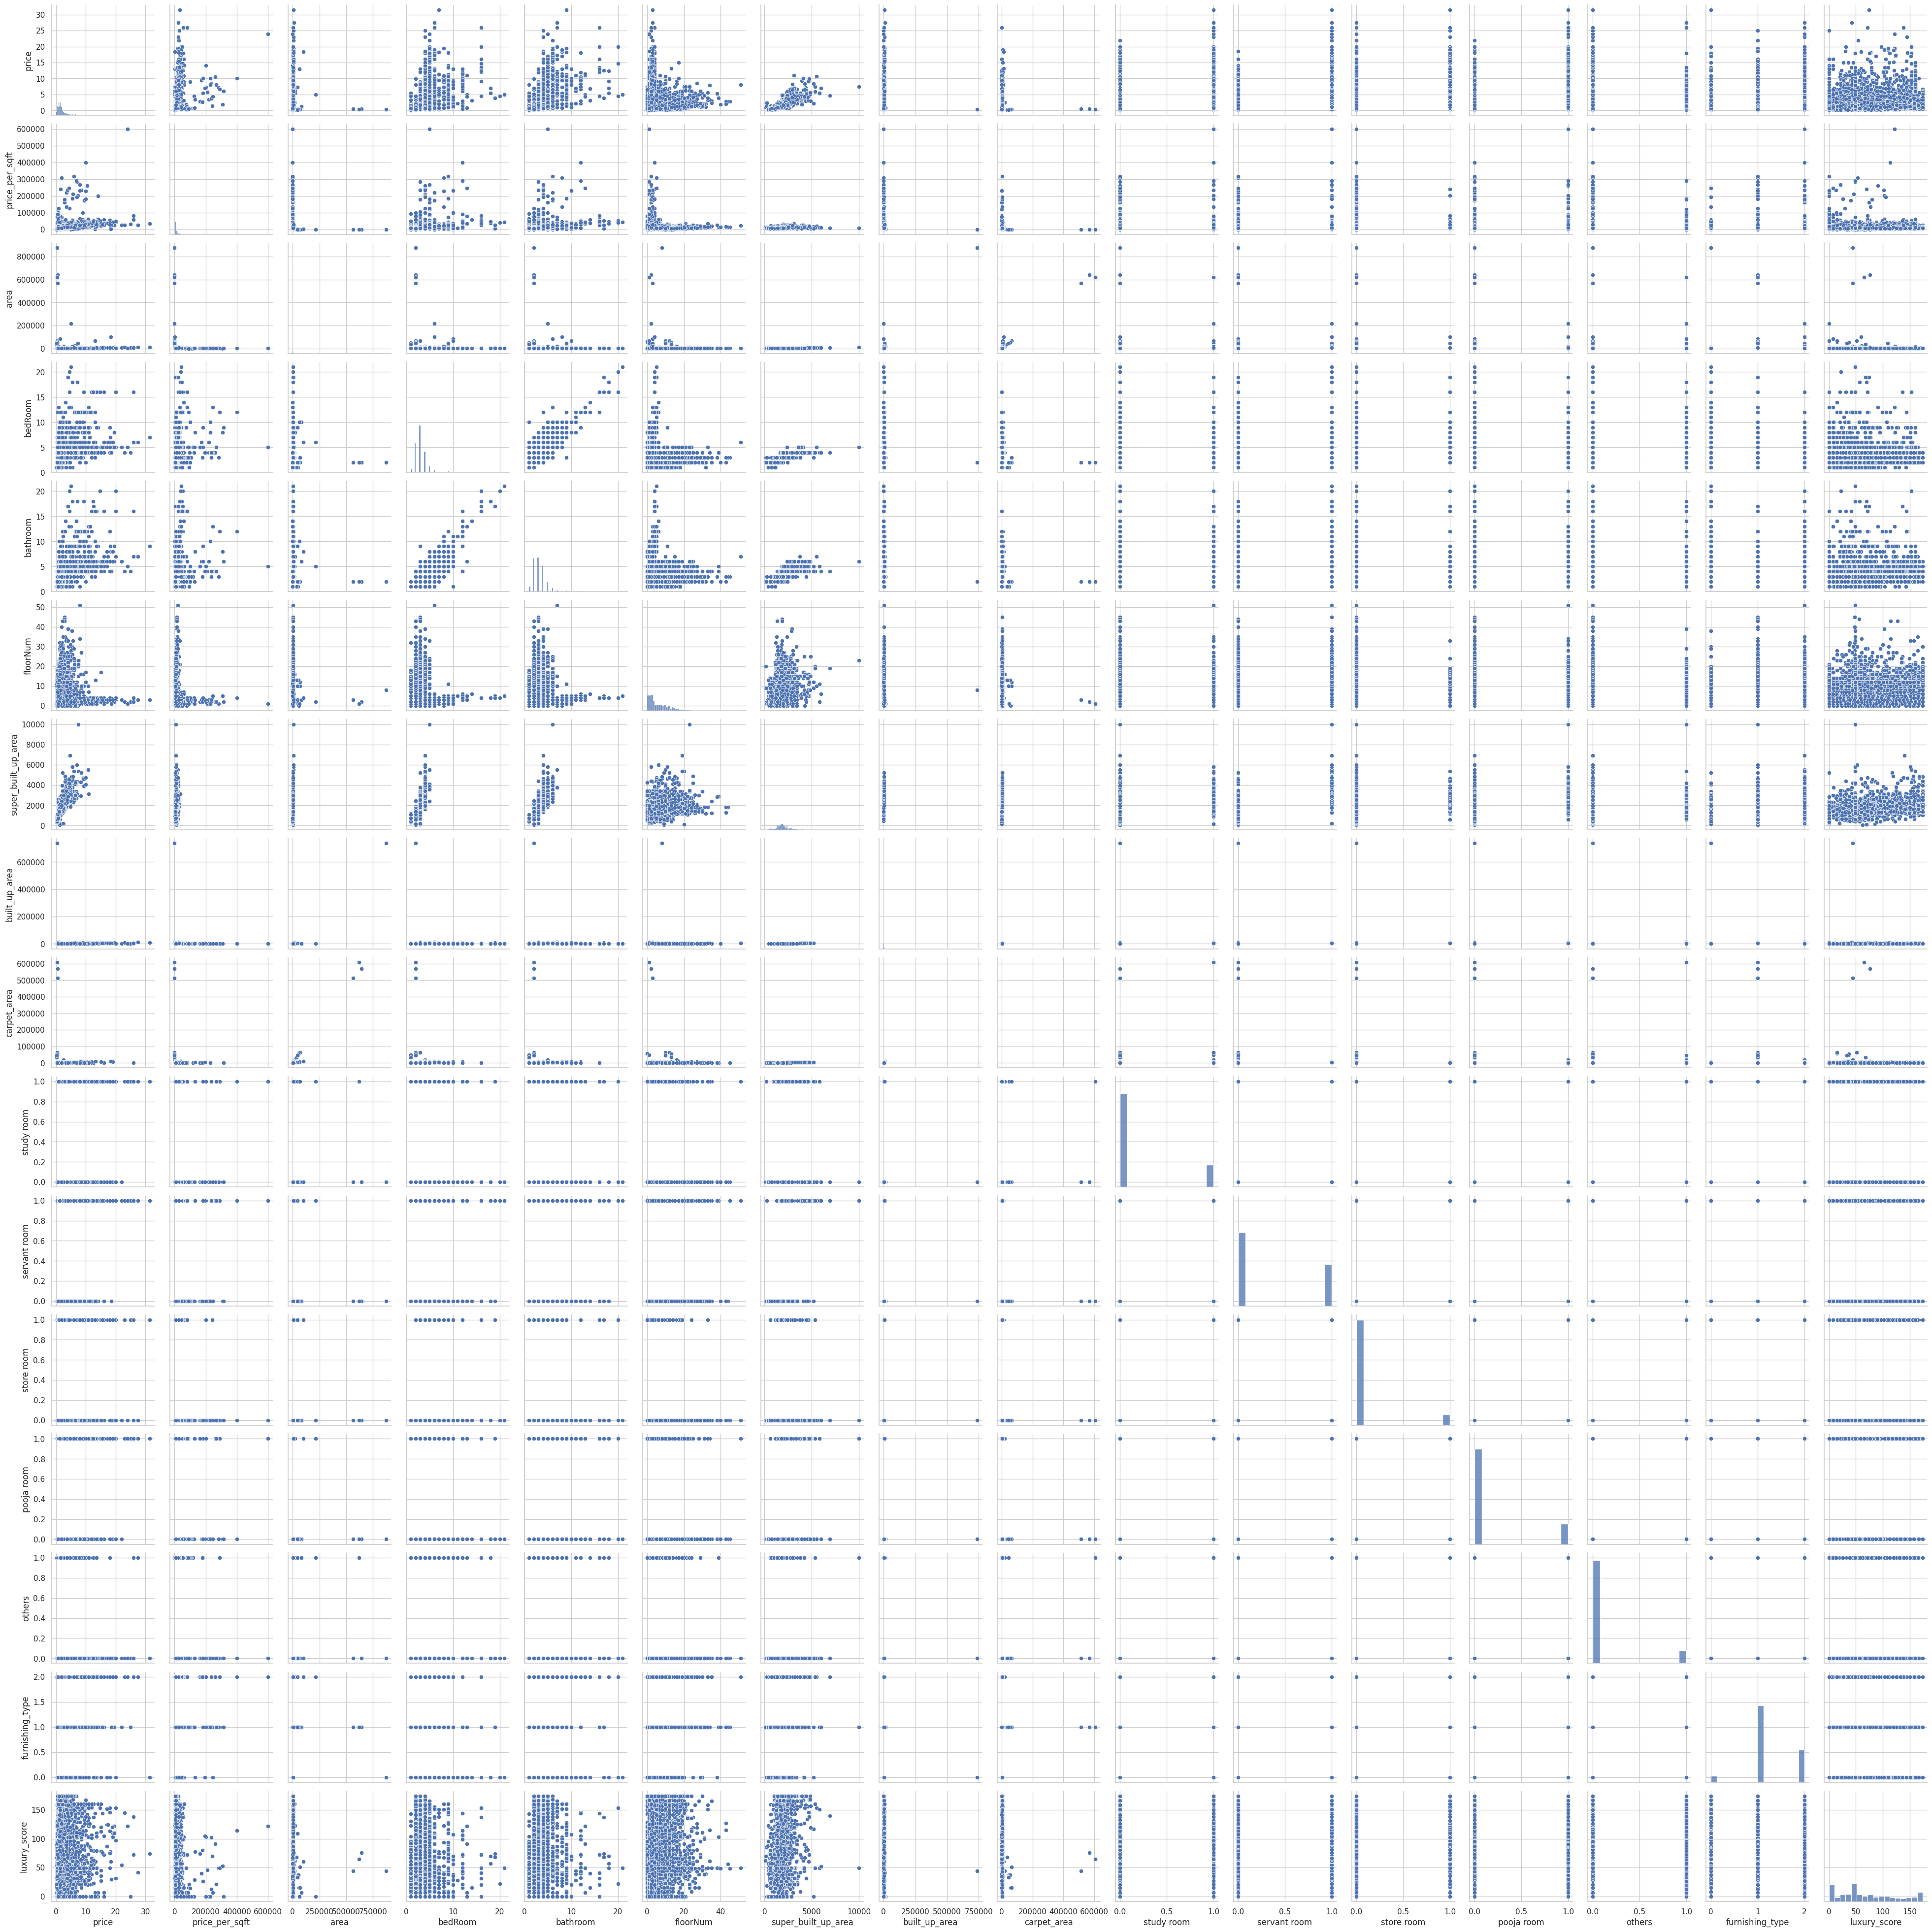

In [ ]:
sns.pairplot(df)